# 데이터 분석 -신생아 이름 분석


**1) 선정이유**: 사람이 태어나면 이름을 짓는다. 동양철학에 따르면 사주와도 관련이 있어서 함부로 짓지 않고 작명소에서 짓는 사람들도 많다고 한다. 이름에도 유달리 많이 보이는 단어들(ex-준,희,성 등)이 있는 반면 거의 사용되지 않는 단어들(ex-쌍,훨,척,긩)도 있다. 개명을 하지 않는 이상 그 사람을 평생 대표하는 기본 인적사항중에 하나인 이름을 데이터 묶음으로 분석했을때 어떠한 특성들이 있을지, 내가 생각한 가설이 맞는지 확인을 하고 싶어서 이 주제를 선정하게 되었다.


**2) 의문설정**
>1. 특정 단어는 이름의 랭킹에 영향을 미칠까? => 상위랭크의 단어들을 조합시 상위랭크의 이름이 나올것이고 최소 70퍼센트의 상관도를 가질것이다.
>2. 특정 단어가 연도별로 유행 혹은 트렌드 같은 흐름이 있을까?
>3. 남자 혹은 여자만 사용하는 단어가 있을까? 있다면 무엇이 있을까?

2)-1 분석방법: 연도별 남녀 이름을 앞글자 뒷글자 별로 정리,도표로 표현,상위랭킹의 특정단어들의 랜덤조합시 생성되는 이름은 실제로도 랭킹이 높은지 비교, 연단위로 큰 흐름을 보았을때 각단어들의 흥망성쇠 확인, 집합을 사용한 남자이름에서만 발견되는 단어 및 여자이름에서만 발견되는단어 추출<br>
이외에 추가적인 분석

**3) 인터넷을 통한 데이터 획득**: 한국인의 이름통계(https://koreanname.me)의 자료들을 csv파일로 정리후 다루었다. 해당 사이트는 전자가족관계시스템 사이트에서 데이터를 받은 후 매일 갱신한다고 한다.


**4) 분석을 위한 데이터 가공 ~ (5) 분석 결과 도출**<br>
가공과 그에 맞는 분석을 유동적으로 제시하여 가독성을 높이도록 한다.

# 15년 남자이름 데이터 분석

In [1]:
# 15년 남자이름 기초데이터 1200개-[이름,랭킹,인원수]
fileMatrix15m = []
with open('2015m.csv','r') as file:
    for lineContent in file:
        fileMatrix15m.append(lineContent.strip('\n').split(','))
print(fileMatrix15m)
#딕셔너리-{이름:랭킹}
dict_15m={fileMatrix15m[i][0]:fileMatrix15m[i][1] for i in range(len(fileMatrix15m))}
print(dict_15m)

[['이름', '랭킹', '이름수'], ['민준', '1', '3857 '], ['서준', '2', '3562 '], ['하준', '3', '3101 '], ['도윤', '4', '2891 '], ['주원', '5', '2762 '], ['예준', '6', '2750 '], ['준우', '7', '2249 '], ['지호', '8', '2189 '], ['지후', '9', '2049 '], ['준서', '10', '2012 '], ['시우', '11', '1942 '], ['도현', '12', '1938 '], ['서진', '13', '1872 '], ['현우', '14', '1859 '], ['선우', '15', '1631 '], ['연우', '16', '1599 '], ['우진', '17', '1582 '], ['지훈', '18', '1568 '], ['수현', '19', '1521 '], ['건우', '20', '1493 '], ['시윤', '21', '1433 '], ['유준', '22', '1423 '], ['정우', '23', '1378 '], ['윤우', '24', '1318 '], ['현준', '25', '1312 '], ['민재', '26', '1237 '], ['승우', '27', '1227 '], ['승현', '28', '1217 '], ['지환', '29', '1178 '], ['유찬', '30', '1163 '], ['승민', '31', '1161 '], ['지우', '32', '1040 '], ['진우', '33', '1033 '], ['은우', '34', '1010 '], ['민성', '35', '1006 '], ['재윤', '36', '990'], ['시원', '37', '951'], ['준영', '38', '891'], ['준혁', '39', '875'], ['우빈', '40', '872'], ['지원', '41', '871'], ['시현', '42', '862'], ['태윤', '43', '841'], ['윤호', '44', '

**15년 남자이름 앞글자 빈도수 분석 및 도표**

In [2]:
#이름 앞글자 갯수분석
import csv
import pandas as pd
m_15_front = list(fileMatrix15m[i][0] for i in range(len(fileMatrix15m)))
del m_15_front[0] #앞에 '이름' 제거
for i in range(len(m_15_front)):
    if len(m_15_front[i]) != 1:
        m_15_front[i] = m_15_front[i][:1] #앞글자 따기
        
setting_m_15_front = [[m_15_front.count(m_15_front[i]),m_15_front[i]] for i in range(len(m_15_front))]
#ex)[[5,강]] 과 같이 횟수,앞글자로 나타내기

import itertools
setting_m_15_front.sort()
last_m_15_front = list(setting_m_15_front for setting_m_15_front,_ in itertools.groupby(setting_m_15_front))#중복제거 및 사용횟수 순서대로 정리
last_m_15_front.reverse()
print(last_m_15_front)

with open('2015m_front.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_m_15_front[i])

df = pd.read_csv('2015m_front.csv',names=['수치','단어'])
df


[[53, '태'], [45, '재'], [40, '민'], [38, '지'], [38, '승'], [37, '동'], [35, '준'], [32, '도'], [30, '윤'], [28, '현'], [28, '성'], [26, '진'], [25, '하'], [25, '찬'], [25, '주'], [25, '정'], [25, '유'], [24, '우'], [24, '서'], [23, '시'], [23, '세'], [21, '이'], [21, '은'], [20, '수'], [19, '영'], [17, '한'], [17, '강'], [16, '예'], [16, '상'], [16, '규'], [16, '건'], [15, '호'], [15, '다'], [13, '채'], [13, '원'], [13, '대'], [12, '희'], [12, '선'], [12, '경'], [11, '해'], [11, '종'], [11, '인'], [11, '용'], [11, '석'], [11, '기'], [10, '효'], [10, '제'], [10, '연'], [10, '리'], [7, '형'], [7, '아'], [7, '범'], [7, '라'], [6, '창'], [6, '루'], [6, '로'], [5, '보'], [5, '병'], [4, '휘'], [4, '혁'], [4, '의'], [4, '신'], [4, '무'], [4, '명'], [4, '가'], [3, '요'], [3, '래'], [3, '담'], [3, '권'], [2, '훈'], [2, '환'], [2, '혜'], [2, '장'], [2, '율'], [2, '온'], [2, '여'], [2, '슬'], [2, '솔'], [2, '산'], [2, '사'], [2, '별'], [2, '단'], [2, '남'], [2, '나'], [2, '근'], [2, '광'], [1, '힘'], [1, '훤'], [1, '후'], [1, '화'], [1, '홍'], [1, '헌'], [1, '필'], [1, '탄'], [1, '중'], 

,수치,단어
0,53,태
1,45,재
2,40,민
3,38,지
4,38,승
5,37,동
6,35,준
7,32,도
8,30,윤
9,28,현


**15년 남자이름 뒷글자 빈도수 분석 및 도표**

In [3]:
#이름 뒷글자 갯수분석
m_15_back = list(fileMatrix15m[i][0] for i in range(len(fileMatrix15m)))
del m_15_back[0] #앞에 '이름' 제거
for i in range(len(m_15_back)):
    if len(m_15_back[i]) != 1:
        m_15_back[i] = m_15_back[i][1:2] #앞글자 따기
        
setting_m_15_back = [[m_15_back.count(m_15_back[i]),m_15_back[i]] for i in range(len(m_15_back))]
#ex)[[5,강]] 과 같이 [횟수,뒷글자]로 나타내기

import itertools
setting_m_15_back.sort()
last_m_15_back = list(setting_m_15_back for setting_m_15_back,_ in itertools.groupby(setting_m_15_back))#중복제거 및 사용횟수 순서대로 정리
last_m_15_back.reverse()
print(last_m_15_back)

with open('2015m_back.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_m_15_back[i])
        
df = pd.read_csv('2015m_back.csv',names=['수치','단어'])
df

[[54, '준'], [47, '현'], [44, '우'], [43, '민'], [42, '찬'], [38, '호'], [35, '율'], [35, '빈'], [34, '원'], [31, '진'], [31, '윤'], [28, '훈'], [28, '후'], [28, '성'], [27, '환'], [27, '하'], [26, '혁'], [24, '한'], [21, '수'], [20, '영'], [19, '재'], [18, '헌'], [18, '석'], [17, '연'], [17, '겸'], [16, '유'], [14, '형'], [14, '욱'], [14, '온'], [14, '승'], [14, '서'], [13, '인'], [13, '운'], [13, '완'], [13, '오'], [13, '규'], [13, '건'], [12, '희'], [11, '주'], [11, '언'], [11, '안'], [11, '범'], [9, '휘'], [9, '웅'], [9, '담'], [8, '솔'], [7, '이'], [7, '용'], [7, '섭'], [6, '태'], [6, '은'], [6, '상'], [6, '기'], [6, '경'], [5, '제'], [5, '엘'], [5, '산'], [5, '모'], [5, '균'], [5, '결'], [4, '아'], [4, '명'], [4, '림'], [4, '루'], [4, '랑'], [4, '람'], [3, '종'], [3, '음'], [3, '엽'], [3, '열'], [3, '리'], [3, '률'], [3, '도'], [3, '근'], [3, '강'], [2, '효'], [2, '홍'], [2, '채'], [2, '중'], [2, '임'], [2, '울'], [2, '신'], [2, '식'], [2, '슬'], [2, '별'], [2, '든'], [2, '권'], [1, '훤'], [1, '화'], [1, '해'], [1, '표'], [1, '택'], [1, '탄'], [1, '총'], [1, '철'], [1, '정'

,수치,단어
0,54,준
1,47,현
2,44,우
3,43,민
4,42,찬
5,38,호
6,35,율
7,35,빈
8,34,원
9,31,진


# 15년 여자이름 데이터 분석

In [4]:
# 15년 여자이름 기초데이터 1200개-[이름,랭킹,인원수]
fileMatrix15f = []
with open('2015f.csv','r') as file:
    for lineContent in file:
        fileMatrix15f.append(lineContent.strip('\n').split(','))
print(fileMatrix15f)

#딕셔너리-{이름:랭킹}
dict_15f={fileMatrix15f[i][0]:fileMatrix15f[i][1] for i in range(len(fileMatrix15f))}
print(dict_15f)

[['이름', '랭킹', '이름수'], ['서윤', '1', '3160 '], ['서연', '2', '3047 '], ['지우', '3', '2772 '], ['지유', '4', '2550 '], ['하윤', '5', '2452 '], ['서현', '6', '2333 '], ['민서', '7', '2301 '], ['하은', '8', '2264 '], ['지아', '9', '2227 '], ['다은', '10', '2072 '], ['채원', '11', '2035 '], ['윤서', '12', '2027 '], ['수아', '13', '1998 '], ['지윤', '14', '1921 '], ['지민', '15', '1824 '], ['소윤', '16', '1810 '], ['은서', '17', '1737 '], ['소율', '18', '1706 '], ['예린', '19', '1632 '], ['지안', '20', '1613 '], ['예원', '21', '1548 '], ['수빈', '22', '1505 '], ['예은', '23', '1489 '], ['시은', '24', '1446 '], ['지원', '25', '1433 '], ['하린', '26', '1426 '], ['주아', '27', '1328 '], ['연서', '28', '1290 '], ['유나', '29', '1278 '], ['채은', '30', '1277 '], ['윤아', '31', '1251 '], ['지율', '32', '1174 '], ['서은', '33', '1146 '], ['하율', '34', '1140 '], ['예나', '35', '1113 '], ['서아', '36', '1106 '], ['예서', '37', '1084 '], ['수연', '38', '1062 '], ['채윤', '39', '1059 '], ['서영', '40', '1049 '], ['유진', '41', '1048 '], ['서율', '42', '1043 '], ['예진', '43', '1011 ']

**15년 여자이름 앞글자 빈도수 분석 및 도표**

In [5]:
#이름 앞글자 갯수분석
f_15_front = list(fileMatrix15f[i][0] for i in range(len(fileMatrix15f)))
del f_15_front[0] #앞에 '이름' 제거
for i in range(len(f_15_front)):
    if len(f_15_front[i]) != 1:
        f_15_front[i] = f_15_front[i][:1] #앞글자 따기
        
setting_f_15_front = [[f_15_front.count(f_15_front[i]),f_15_front[i]] for i in range(len(f_15_front))]
#ex)[[5,강]] 과 같이 횟수,앞글자로 나타내기

import itertools
setting_f_15_front.sort()
last_f_15_front = list(setting_f_15_front for setting_f_15_front,_ in itertools.groupby(setting_f_15_front))#중복제거 및 사용횟수 순서대로 정리
last_f_15_front.reverse()
print(last_f_15_front)

with open('2015f_front.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_f_15_front[i])

df = pd.read_csv('2015f_front.csv',names=['수치','단어'])
df

[[44, '예'], [42, '하'], [40, '은'], [37, '지'], [37, '다'], [36, '유'], [34, '혜'], [31, '소'], [31, '서'], [30, '이'], [30, '윤'], [27, '채'], [27, '아'], [27, '민'], [26, '세'], [25, '나'], [24, '수'], [22, '해'], [22, '가'], [21, '희'], [21, '리'], [21, '라'], [20, '주'], [20, '연'], [20, '승'], [20, '미'], [19, '보'], [18, '효'], [18, '현'], [18, '시'], [17, '정'], [17, '선'], [16, '태'], [16, '도'], [15, '한'], [14, '재'], [13, '규'], [11, '영'], [11, '설'], [10, '진'], [10, '우'], [10, '솔'], [10, '성'], [10, '루'], [9, '송'], [9, '단'], [8, '초'], [8, '인'], [8, '여'], [8, '새'], [8, '경'], [7, '제'], [7, '로'], [6, '율'], [5, '준'], [5, '자'], [5, '슬'], [5, '별'], [4, '조'], [4, '엘'], [4, '신'], [4, '명'], [4, '레'], [4, '래'], [4, '담'], [3, '호'], [3, '찬'], [3, '원'], [3, '온'], [3, '애'], [3, '린'], [3, '려'], [3, '동'], [3, '노'], [2, '화'], [2, '푸'], [2, '차'], [2, '의'], [2, '에'], [2, '안'], [2, '상'], [2, '사'], [2, '비'], [2, '봄'], [2, '마'], [2, '그'], [2, '교'], [2, '고'], [1, '환'], [1, '클'], [1, '청'], [1, '장'], [1, '을'], [1, '요'], [1, '올'], [1, '

,수치,단어
0,44,예
1,42,하
2,40,은
3,37,지
4,37,다
5,36,유
6,34,혜
7,31,소
8,31,서
9,30,이


**15년 여자이름 뒷글자 빈도수 분석 및 도표**

In [6]:
#이름 뒷글자 갯수분석
f_15_back = list(fileMatrix15f[i][0] for i in range(len(fileMatrix15f)))
del f_15_back[0] #앞에 '이름' 제거
for i in range(len(f_15_back)):
    if len(f_15_back[i]) != 1:
        f_15_back[i] = f_15_back[i][1:2] #앞글자 따기
        
setting_f_15_back = [[f_15_back.count(f_15_back[i]),f_15_back[i]] for i in range(len(f_15_back))]
#ex)[[5,강]] 과 같이 [횟수,뒷글자]로 나타내기

import itertools
setting_f_15_back.sort()
last_f_15_back = list(setting_f_15_back for setting_f_15_back,_ in itertools.groupby(setting_f_15_back))#중복제거 및 사용횟수 순서대로 정리
last_f_15_back.reverse()
print(last_f_15_back)

with open('2015f_back.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_f_15_back[i])

df = pd.read_csv('2015f_back.csv',names=['수치','단어'])
df

[[54, '아'], [51, '희'], [49, '은'], [38, '영'], [37, '연'], [37, '빈'], [36, '하'], [32, '이'], [32, '원'], [31, '윤'], [30, '현'], [29, '진'], [29, '나'], [29, '경'], [28, '리'], [27, '정'], [26, '주'], [26, '민'], [25, '린'], [23, '율'], [21, '미'], [20, '인'], [20, '서'], [19, '유'], [19, '비'], [18, '혜'], [18, '지'], [17, '솔'], [16, '온'], [16, '림'], [14, '우'], [14, '안'], [14, '라'], [13, '예'], [13, '선'], [12, '엘'], [10, '음'], [10, '언'], [10, '슬'], [10, '령'], [10, '담'], [9, '수'], [8, '재'], [8, '설'], [8, '별'], [8, '랑'], [7, '화'], [7, '송'], [6, '호'], [6, '애'], [6, '성'], [6, '람'], [5, '후'], [5, '채'], [5, '임'], [5, '을'], [5, '울'], [5, '운'], [5, '솜'], [5, '루'], [5, '란'], [4, '효'], [4, '승'], [4, '봄'], [4, '름'], [4, '니'], [4, '결'], [3, '해'], [3, '소'], [3, '겸'], [2, '준'], [2, '제'], [2, '빛'], [2, '론'], [2, '레'], [2, '래'], [2, '들'], [2, '든'], [2, '다'], [2, '교'], [1, '흰'], [1, '휘'], [1, '형'], [1, '헬'], [1, '향'], [1, '피'], [1, '총'], [1, '체'], [1, '찬'], [1, '조'], [1, '움'], [1, '완'], [1, '올'], [1, '오'], [1, '양'], [1, '얀']

,수치,단어
0,54,아
1,51,희
2,49,은
3,38,영
4,37,연
5,37,빈
6,36,하
7,32,이
8,32,원
9,31,윤


# 16년 남자이름 데이터 분석

In [7]:
# 16년 남자이름 기초데이터 1200개-[이름,랭킹,인원수]
fileMatrix16m = []
with open('2016m.csv','r') as file:
    for lineContent in file:
        fileMatrix16m.append(lineContent.strip('\n').split(','))
print(fileMatrix16m)

dict_16m={fileMatrix16m[i][0]:fileMatrix15f[i][1] for i in range(len(fileMatrix16m))}
print(dict_16m)

[['이름', '랭킹', '이름수'], ['민준', '1', '2991 '], ['서준', '2', '2957 '], ['하준', '3', '2945 '], ['도윤', '4', '2855 '], ['주원', '5', '2573 '], ['예준', '6', '2571 '], ['시우', '7', '2207 '], ['지호', '8', '2200 '], ['준우', '9', '1973 '], ['유준', '10', '1866 '], ['지후', '11', '1793 '], ['도현', '12', '1659 '], ['서진', '13', '1615 '], ['준서', '14', '1583 '], ['시윤', '15', '1577 '], ['건우', '16', '1541 '], ['현우', '17', '1499 '], ['선우', '18', '1472 '], ['연우', '19', '1456 '], ['지훈', '20', '1454 '], ['우진', '21', '1447 '], ['윤우', '22', '1223 '], ['정우', '23', '1158 '], ['지환', '24', '1156 '], ['지안', '25', '1125 '], ['은우', '26', '1115 '], ['민재', '27', '1087 '], ['수현', '28', '1085 '], ['승우', '29', '1054 '], ['현준', '30', '1021 '], ['유찬', '31', '1003 '], ['시원', '32', '993'], ['승현', '33', '963'], ['진우', '34', '944'], ['지한', '35', '942'], ['시현', '36', '931'], ['지우', '37', '928'], ['재윤', '38', '922'], ['지원', '39', '891'], ['수호', '40', '882'], ['이안', '41', '864'], ['서우', '42', '854'], ['시후', '43', '851'], ['시온', '44', '838'], [

**16년 남자이름 앞글자 빈도수 분석 및 도표**

In [8]:
#이름 앞글자 갯수분석
m_16_front = list(fileMatrix16m[i][0] for i in range(len(fileMatrix16m)))
del m_16_front[0] #앞에 '이름' 제거
for i in range(len(m_16_front)):
    if len(m_16_front[i]) != 1:
        m_16_front[i] = m_16_front[i][:1] #앞글자 따기
        
setting_m_16_front = [[m_16_front.count(m_16_front[i]),m_16_front[i]] for i in range(len(m_16_front))]
#ex)[[5,강]] 과 같이 횟수,앞글자로 나타내기

import itertools
setting_m_16_front.sort()
last_m_16_front = list(setting_m_16_front for setting_m_16_front,_ in itertools.groupby(setting_m_16_front))#중복제거 및 사용횟수 순서대로 정리
last_m_16_front.reverse()
print(last_m_16_front)

with open('2016m_front.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_m_16_front[i])

df = pd.read_csv('2016m_front.csv',names=['수치','단어'])
df

[[52, '태'], [42, '재'], [41, '승'], [40, '민'], [39, '지'], [38, '준'], [34, '도'], [33, '동'], [32, '윤'], [30, '유'], [28, '하'], [28, '시'], [27, '현'], [27, '진'], [27, '정'], [26, '성'], [25, '서'], [22, '은'], [21, '주'], [21, '이'], [21, '우'], [20, '세'], [19, '찬'], [19, '영'], [19, '수'], [17, '다'], [16, '한'], [16, '예'], [16, '상'], [16, '건'], [16, '강'], [14, '호'], [14, '원'], [14, '규'], [13, '해'], [13, '선'], [12, '희'], [12, '채'], [12, '기'], [12, '경'], [11, '용'], [11, '리'], [11, '대'], [10, '종'], [10, '제'], [10, '인'], [9, '효'], [9, '연'], [8, '형'], [8, '보'], [8, '범'], [8, '로'], [7, '석'], [7, '라'], [6, '아'], [6, '무'], [5, '신'], [5, '루'], [4, '창'], [4, '의'], [4, '병'], [3, '휘'], [3, '혁'], [3, '요'], [3, '명'], [3, '래'], [3, '담'], [3, '단'], [3, '노'], [3, '근'], [3, '권'], [3, '가'], [2, '훈'], [2, '환'], [2, '혜'], [2, '푸'], [2, '장'], [2, '율'], [2, '온'], [2, '여'], [2, '슬'], [2, '설'], [2, '사'], [2, '부'], [2, '별'], [2, '광'], [1, '훤'], [1, '후'], [1, '화'], [1, '홍'], [1, '헌'], [1, '필'], [1, '치'], [1, '중'], [1, '일'], [1,

,수치,단어
0,52,태
1,42,재
2,41,승
3,40,민
4,39,지
5,38,준
6,34,도
7,33,동
8,32,윤
9,30,유


**16년 남자이름 뒷글자 빈도수 분석 및 도표**

In [9]:
#이름 뒷글자 갯수분석
m_16_back = list(fileMatrix16m[i][0] for i in range(len(fileMatrix16m)))
del m_16_back[0] #앞에 '이름' 제거
for i in range(len(m_16_back)):
    if len(m_16_back[i]) != 1:
        m_16_back[i] = m_16_back[i][1:2] #앞글자 따기
        
setting_m_16_back = [[m_16_back.count(m_16_back[i]),m_16_back[i]] for i in range(len(m_16_back))]
#ex)[[5,강]] 과 같이 [횟수,뒷글자]로 나타내기

import itertools
setting_m_16_back.sort()
last_m_16_back = list(setting_m_16_back for setting_m_16_back,_ in itertools.groupby(setting_m_16_back))#중복제거 및 사용횟수 순서대로 정리
last_m_16_back.reverse()
print(last_m_16_back)

with open('2016m_back.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_m_16_back[i])

df = pd.read_csv('2016m_back.csv',names=['수치','단어'])
df

[[50, '준'], [45, '현'], [43, '우'], [41, '민'], [39, '빈'], [38, '호'], [36, '율'], [36, '원'], [33, '찬'], [32, '진'], [29, '윤'], [28, '성'], [27, '훈'], [27, '후'], [27, '하'], [26, '환'], [25, '혁'], [22, '영'], [21, '한'], [20, '재'], [18, '수'], [16, '욱'], [16, '연'], [16, '겸'], [15, '헌'], [15, '유'], [15, '운'], [15, '온'], [15, '규'], [15, '건'], [14, '형'], [14, '완'], [14, '오'], [14, '석'], [14, '서'], [12, '희'], [12, '안'], [12, '승'], [11, '솔'], [10, '휘'], [10, '주'], [10, '인'], [10, '웅'], [10, '언'], [9, '범'], [9, '담'], [9, '경'], [8, '이'], [8, '섭'], [7, '태'], [7, '용'], [7, '아'], [6, '은'], [6, '상'], [6, '기'], [6, '강'], [5, '제'], [5, '엘'], [5, '산'], [5, '모'], [5, '결'], [4, '엽'], [4, '림'], [4, '리'], [4, '랑'], [4, '도'], [4, '근'], [4, '균'], [3, '일'], [3, '음'], [3, '을'], [3, '루'], [3, '람'], [2, '홍'], [2, '표'], [2, '철'], [2, '종'], [2, '울'], [2, '열'], [2, '신'], [2, '별'], [2, '명'], [2, '름'], [2, '률'], [2, '든'], [2, '다'], [2, '권'], [2, '검'], [1, '훤'], [1, '효'], [1, '화'], [1, '해'], [1, '택'], [1, '총'], [1, '중'], [1, '

,수치,단어
0,50,준
1,45,현
2,43,우
3,41,민
4,39,빈
5,38,호
6,36,율
7,36,원
8,33,찬
9,32,진


# 16년 여자이름 데이터 분석

In [10]:
# 16년 여자이름 기초데이터 1200개-[이름,랭킹,인원수]
fileMatrix16f = []
with open('2016f.csv','r') as file:
    for lineContent in file:
        fileMatrix16f.append(lineContent.strip('\n').split(','))
print(fileMatrix16f)

dict_16f={fileMatrix16f[i][0]:fileMatrix16f[i][1] for i in range(len(fileMatrix16f))}
print(dict_16f)

[['이름', '랭킹', '이름수'], ['서윤', '1', '2854 '], ['서연', '2', '2581 '], ['하윤', '3', '2450 '], ['지유', '4', '2448 '], ['지우', '5', '2380 '], ['하은', '6', '2097 '], ['지아', '7', '2009 '], ['수아', '8', '1984 '], ['서현', '9', '1903 '], ['하린', '10', '1836 '], ['민서', '11', '1794 '], ['다은', '12', '1789 '], ['채원', '13', '1783 '], ['서우', '14', '1748 '], ['윤서', '15', '1618 '], ['지안', '16', '1605 '], ['소율', '17', '1580 '], ['서아', '18', '1532 '], ['지윤', '19', '1498 '], ['예린', '20', '1452 '], ['시은', '21', '1423 '], ['지원', '22', '1421 '], ['은서', '23', '1414 '], ['소윤', '24', '1405 '], ['주아', '25', '1334 '], ['예은', '26', '1330 '], ['시아', '27', '1277 '], ['유주', '28', '1248 '], ['수빈', '28', '1248 '], ['유나', '30', '1224 '], ['서은', '31', '1180 '], ['지민', '32', '1169 '], ['채아', '33', '1158 '], ['연서', '34', '1147 '], ['다온', '35', '1138 '], ['예원', '36', '1131 '], ['서하', '37', '1112 '], ['하율', '38', '1106 '], ['채은', '39', '1071 '], ['윤아', '40', '1069 '], ['아린', '41', '1024 '], ['지율', '42', '988'], ['예나', '43', '986'], ['

**16년 여자이름 앞글자 빈도수 분석 및 도표**

In [11]:
#이름 앞글자 갯수분석
f_16_front = list(fileMatrix16f[i][0] for i in range(len(fileMatrix16f)))
del f_16_front[0] #앞에 '이름' 제거
for i in range(len(f_16_front)):
    if len(f_16_front[i]) != 1:
        f_16_front[i] = f_16_front[i][:1] #앞글자 따기
        
setting_f_16_front = [[f_16_front.count(f_16_front[i]),f_16_front[i]] for i in range(len(f_16_front))]
#ex)[[5,강]] 과 같이 횟수,앞글자로 나타내기

import itertools
setting_f_16_front.sort()
last_f_16_front = list(setting_f_16_front for setting_f_16_front,_ in itertools.groupby(setting_f_16_front))#중복제거 및 사용횟수 순서대로 정리
last_f_16_front.reverse()
print(last_f_16_front)

with open('2016f_front.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_f_16_front[i])

df = pd.read_csv('2016f_front.csv',names=['수치','단어'])
df

[[46, '하'], [45, '예'], [41, '은'], [39, '유'], [39, '다'], [38, '지'], [33, '혜'], [33, '서'], [31, '해'], [31, '이'], [31, '소'], [27, '아'], [26, '채'], [26, '윤'], [25, '세'], [25, '민'], [25, '나'], [24, '수'], [22, '주'], [21, '연'], [21, '보'], [21, '리'], [21, '가'], [20, '시'], [19, '희'], [18, '정'], [18, '라'], [17, '현'], [17, '태'], [17, '승'], [16, '효'], [16, '선'], [16, '도'], [14, '한'], [14, '미'], [13, '재'], [13, '규'], [12, '진'], [11, '설'], [10, '여'], [10, '송'], [10, '솔'], [10, '루'], [9, '초'], [9, '제'], [9, '인'], [9, '영'], [9, '성'], [8, '로'], [8, '단'], [7, '율'], [7, '우'], [7, '새'], [7, '경'], [6, '슬'], [5, '준'], [5, '조'], [5, '자'], [5, '신'], [4, '화'], [4, '엘'], [4, '별'], [4, '명'], [4, '담'], [4, '그'], [3, '찬'], [3, '애'], [3, '상'], [3, '린'], [3, '래'], [3, '노'], [3, '기'], [2, '호'], [2, '푸'], [2, '차'], [2, '원'], [2, '온'], [2, '에'], [2, '안'], [2, '사'], [2, '비'], [2, '봄'], [2, '려'], [2, '레'], [2, '고'], [1, '환'], [1, '향'], [1, '클'], [1, '청'], [1, '의'], [1, '을'], [1, '올'], [1, '열'], [1, '어'], [1, '솜'], [1, '샤

,수치,단어
0,46,하
1,45,예
2,41,은
3,39,유
4,39,다
5,38,지
6,33,혜
7,33,서
8,31,해
9,31,이


**16년 여자이름 뒷글자 빈도수 분석 및 도표**

In [12]:
#이름 뒷글자 갯수분석
f_16_back = list(fileMatrix16f[i][0] for i in range(len(fileMatrix16f)))
del f_16_back[0] #앞에 '이름' 제거
for i in range(len(f_16_back)):
    if len(f_16_back[i]) != 1:
        f_16_back[i] = f_16_back[i][1:2] #앞글자 따기
        
setting_f_16_back = [[f_16_back.count(f_16_back[i]),f_16_back[i]] for i in range(len(f_16_back))]
#ex)[[5,강]] 과 같이 [횟수,뒷글자]로 나타내기

import itertools
setting_f_16_back.sort()
last_f_16_back = list(setting_f_16_back for setting_f_16_back,_ in itertools.groupby(setting_f_16_back))#중복제거 및 사용횟수 순서대로 정리
last_f_16_back.reverse()
print(last_f_16_back)

with open('2016f_back.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_f_16_back[i])

df = pd.read_csv('2016f_back.csv',names=['수치','단어'])
df

[[55, '아'], [49, '희'], [47, '은'], [37, '하'], [37, '연'], [36, '영'], [34, '빈'], [33, '이'], [33, '경'], [32, '윤'], [31, '원'], [30, '리'], [29, '현'], [27, '진'], [27, '린'], [27, '나'], [25, '민'], [24, '정'], [24, '율'], [23, '서'], [21, '주'], [21, '미'], [20, '인'], [20, '유'], [20, '비'], [18, '솔'], [18, '림'], [16, '혜'], [16, '온'], [16, '안'], [15, '지'], [14, '우'], [14, '라'], [12, '예'], [12, '엘'], [12, '선'], [11, '령'], [11, '담'], [10, '언'], [10, '슬'], [10, '수'], [9, '음'], [9, '별'], [8, '재'], [8, '설'], [7, '호'], [7, '운'], [7, '랑'], [7, '니'], [6, '화'], [6, '채'], [6, '을'], [6, '송'], [6, '성'], [6, '람'], [5, '후'], [5, '울'], [5, '애'], [5, '솜'], [5, '겸'], [4, '임'], [4, '소'], [4, '봄'], [4, '름'], [4, '론'], [4, '결'], [3, '효'], [3, '제'], [3, '오'], [3, '루'], [3, '란'], [2, '해'], [2, '준'], [2, '승'], [2, '빛'], [2, '레'], [2, '래'], [2, '든'], [2, '다'], [2, '늬'], [2, '늘'], [2, '기'], [2, '교'], [1, '흰'], [1, '흔'], [1, '휘'], [1, '형'], [1, '헬'], [1, '향'], [1, '피'], [1, '총'], [1, '조'], [1, '완'], [1, '와'], [1, '옴'], [1, '올']

,수치,단어
0,55,아
1,49,희
2,47,은
3,37,하
4,37,연
5,36,영
6,34,빈
7,33,이
8,33,경
9,32,윤


# 17년 남자이름 데이터 분석

In [13]:
# 17년 남자이름 기초데이터 1200개-[이름,랭킹,인원수]
fileMatrix17m = []
with open('2017m.csv','r') as file:
    for lineContent in file:
        fileMatrix17m.append(lineContent.strip('\n').split(','))
print(fileMatrix17m)

dict_17m={fileMatrix17m[i][0]:fileMatrix17m[i][1] for i in range(len(fileMatrix17m))}
print(dict_17m)

[['이름', '랭킹', '이름수'], ['하준', '1', '2767 '], ['도윤', '2', '2722 '], ['서준', '3', '2483 '], ['시우', '4', '2394 '], ['민준', '5', '2275 '], ['주원', '6', '2167 '], ['예준', '7', '2146 '], ['유준', '8', '1958 '], ['지호', '9', '1906 '], ['준우', '10', '1704 '], ['선우', '11', '1629 '], ['시윤', '12', '1612 '], ['은우', '13', '1515 '], ['지후', '14', '1500 '], ['우진', '15', '1465 '], ['도현', '16', '1453 '], ['서진', '17', '1442 '], ['연우', '18', '1329 '], ['건우', '19', '1313 '], ['윤우', '20', '1294 '], ['현우', '21', '1240 '], ['준서', '22', '1222 '], ['지훈', '23', '1137 '], ['지안', '24', '1104 '], ['민재', '25', '1064 '], ['수호', '26', '1053 '], ['승우', '27', '996'], ['정우', '28', '975'], ['이안', '29', '913'], ['시온', '30', '912'], ['시현', '31', '905'], ['이준', '32', '889'], ['시원', '33', '888'], ['시후', '34', '861'], ['수현', '35', '857'], ['지우', '36', '844'], ['유찬', '37', '829'], ['지환', '38', '822'], ['서우', '39', '817'], ['지한', '40', '805'], ['현준', '41', '777'], ['승현', '42', '742'], ['재윤', '43', '712'], ['우빈', '44', '700'], ['다온', '45'

**17년 남자이름 앞글자 빈도수 분석 및 도표**

In [14]:
#이름 앞글자 갯수분석
m_17_front = list(fileMatrix17m[i][0] for i in range(len(fileMatrix17m)))
del m_17_front[0] #앞에 '이름' 제거
for i in range(len(m_17_front)):
    if len(m_17_front[i]) != 1:
        m_17_front[i] = m_17_front[i][:1] #앞글자 따기
        
setting_m_17_front = [[m_17_front.count(m_17_front[i]),m_17_front[i]] for i in range(len(m_17_front))]
#ex)[[5,강]] 과 같이 횟수,앞글자로 나타내기

import itertools
setting_m_17_front.sort()
last_m_17_front = list(setting_m_17_front for setting_m_17_front,_ in itertools.groupby(setting_m_17_front))#중복제거 및 사용횟수 순서대로 정리
last_m_17_front.reverse()
print(last_m_17_front)

with open('2017m_front.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_m_17_front[i])

df = pd.read_csv('2017m_front.csv',names=['수치','단어'])
df

[[52, '태'], [43, '재'], [39, '지'], [39, '민'], [38, '승'], [37, '준'], [34, '도'], [30, '윤'], [30, '유'], [29, '동'], [28, '현'], [28, '하'], [27, '시'], [25, '이'], [25, '서'], [24, '진'], [23, '정'], [23, '세'], [23, '성'], [22, '찬'], [22, '주'], [21, '은'], [21, '우'], [21, '다'], [20, '예'], [18, '영'], [18, '수'], [17, '상'], [16, '강'], [14, '호'], [14, '채'], [14, '건'], [13, '해'], [13, '한'], [13, '리'], [13, '규'], [13, '경'], [12, '원'], [12, '선'], [11, '희'], [11, '용'], [11, '대'], [10, '인'], [10, '연'], [10, '기'], [9, '종'], [9, '제'], [9, '로'], [8, '석'], [8, '범'], [8, '루'], [8, '라'], [7, '효'], [7, '아'], [7, '보'], [6, '형'], [6, '신'], [6, '무'], [5, '의'], [5, '가'], [4, '휘'], [4, '병'], [4, '래'], [3, '혁'], [3, '창'], [3, '요'], [3, '산'], [3, '바'], [3, '명'], [3, '담'], [3, '단'], [3, '노'], [2, '훈'], [2, '환'], [2, '혜'], [2, '온'], [2, '여'], [2, '슬'], [2, '솔'], [2, '설'], [2, '사'], [2, '별'], [2, '남'], [2, '권'], [2, '광'], [1, '훤'], [1, '후'], [1, '홍'], [1, '헌'], [1, '필'], [1, '푸'], [1, '치'], [1, '중'], [1, '조'], [1, '장'], [1, 

,수치,단어
0,52,태
1,43,재
2,39,지
3,39,민
4,38,승
5,37,준
6,34,도
7,30,윤
8,30,유
9,29,동


**17년 남자이름 뒷글자 빈도수 및 도표**

In [15]:
#이름 뒷글자 갯수분석
m_17_back = list(fileMatrix17m[i][0] for i in range(len(fileMatrix17m)))
del m_17_back[0] #앞에 '이름' 제거
for i in range(len(m_17_back)):
    if len(m_17_back[i]) != 1:
        m_17_back[i] = m_17_back[i][1:2] #앞글자 따기
        
setting_m_17_back = [[m_17_back.count(m_17_back[i]),m_17_back[i]] for i in range(len(m_17_back))]
#ex)[[5,강]] 과 같이 [횟수,뒷글자]로 나타내기

import itertools
setting_m_17_back.sort()
last_m_17_back = list(setting_m_17_back for setting_m_17_back,_ in itertools.groupby(setting_m_17_back))#중복제거 및 사용횟수 순서대로 정리
last_m_17_back.reverse()
print(last_m_17_back)

with open('2017m_back.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_m_17_back[i])

df = pd.read_csv('2017m_back.csv',names=['수치','단어'])
df

[[53, '준'], [46, '현'], [44, '우'], [43, '민'], [39, '빈'], [38, '원'], [37, '호'], [35, '율'], [33, '찬'], [31, '진'], [31, '윤'], [31, '성'], [28, '하'], [27, '훈'], [27, '후'], [25, '혁'], [23, '환'], [22, '한'], [20, '재'], [19, '겸'], [18, '영'], [18, '수'], [16, '유'], [16, '온'], [16, '오'], [16, '연'], [16, '건'], [14, '운'], [14, '서'], [14, '규'], [13, '희'], [13, '형'], [13, '헌'], [13, '완'], [13, '안'], [13, '솔'], [13, '석'], [12, '욱'], [11, '인'], [10, '주'], [10, '웅'], [10, '범'], [10, '담'], [9, '휘'], [9, '이'], [9, '언'], [8, '승'], [8, '섭'], [8, '경'], [7, '엘'], [7, '아'], [6, '용'], [6, '람'], [6, '기'], [5, '태'], [5, '상'], [5, '산'], [5, '모'], [5, '균'], [5, '결'], [5, '강'], [4, '제'], [4, '은'], [4, '울'], [4, '림'], [4, '리'], [4, '루'], [4, '도'], [4, '근'], [3, '을'], [3, '랑'], [3, '든'], [2, '홍'], [2, '중'], [2, '종'], [2, '음'], [2, '엽'], [2, '열'], [2, '신'], [2, '슬'], [2, '별'], [2, '름'], [2, '률'], [2, '론'], [2, '다'], [2, '늘'], [2, '권'], [1, '훤'], [1, '효'], [1, '화'], [1, '해'], [1, '표'], [1, '택'], [1, '총'], [1, '철'], [1, '채

,수치,단어
0,53,준
1,46,현
2,44,우
3,43,민
4,39,빈
5,38,원
6,37,호
7,35,율
8,33,찬
9,31,진


# 17년 여자이름 데이터 분석

In [16]:
# 17년 여자이름 기초데이터 1200개-[이름,랭킹,인원수]
fileMatrix17f = []
with open('2017f.csv','r') as file:
    for lineContent in file:
        fileMatrix17f.append(lineContent.strip('\n').split(','))
print(fileMatrix17f)
dict_17f={fileMatrix17f[i][0]:fileMatrix17f[i][1] for i in range(len(fileMatrix17f))}
print(dict_17f)

[['이름', '랭킹', '이름수'], ['하윤', '1', '2498 '], ['서윤', '2', '2385 '], ['서연', '3', '2109 '], ['하은', '4', '2052 '], ['지유', '5', '2023 '], ['하린', '6', '1933 '], ['지우', '7', '1925 '], ['수아', '8', '1837 '], ['지아', '9', '1772 '], ['서아', '10', '1740 '], ['지안', '11', '1554 '], ['다은', '12', '1545 '], ['서현', '13', '1478 '], ['시아', '14', '1454 '], ['채원', '15', '1434 '], ['예린', '16', '1381 '], ['소율', '17', '1359 '], ['민서', '18', '1312 '], ['윤서', '19', '1302 '], ['소윤', '20', '1273 '], ['아린', '21', '1257 '], ['서우', '22', '1241 '], ['은서', '23', '1166 '], ['채아', '24', '1162 '], ['지윤', '25', '1158 '], ['유주', '26', '1146 '], ['다온', '27', '1131 '], ['유나', '28', '1121 '], ['시은', '29', '1109 '], ['하연', '30', '1102 '], ['주아', '31', '1069 '], ['예은', '32', '1044 '], ['채은', '33', '1029 '], ['서하', '33', '1029 '], ['수빈', '35', '1026 '], ['하율', '36', '1010 '], ['서은', '37', '966'], ['지원', '38', '956'], ['윤아', '39', '949'], ['채윤', '40', '948'], ['아인', '41', '924'], ['예나', '42', '918'], ['연서', '43', '886'], ['서율', '44',

**17년 여자이름 앞글자 빈도수 및 도표**

In [17]:
#이름 앞글자 갯수분석
f_17_front = list(fileMatrix17f[i][0] for i in range(len(fileMatrix17f)))
del f_17_front[0] #앞에 '이름' 제거
for i in range(len(f_17_front)):
    if len(f_17_front[i]) != 1:
        f_17_front[i] = f_17_front[i][:1] #앞글자 따기
        
setting_f_17_front = [[f_17_front.count(f_17_front[i]),f_17_front[i]] for i in range(len(f_17_front))]
#ex)[[5,강]] 과 같이 횟수,앞글자로 나타내기

import itertools
setting_f_17_front.sort()
last_f_17_front = list(setting_f_17_front for setting_f_17_front,_ in itertools.groupby(setting_f_17_front))#중복제거 및 사용횟수 순서대로 정리
last_f_17_front.reverse()
print(last_f_17_front)

with open('2017f_front.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_f_17_front[i])

df = pd.read_csv('2017f_front.csv',names=['수치','단어'])
df

[[46, '하'], [44, '예'], [43, '은'], [37, '지'], [37, '다'], [35, '유'], [33, '서'], [32, '혜'], [32, '이'], [31, '소'], [30, '채'], [30, '윤'], [29, '아'], [28, '나'], [27, '세'], [25, '해'], [24, '민'], [23, '수'], [22, '주'], [22, '리'], [21, '가'], [20, '희'], [20, '시'], [20, '라'], [19, '효'], [19, '연'], [19, '보'], [18, '미'], [16, '태'], [16, '정'], [16, '선'], [16, '도'], [15, '현'], [15, '한'], [14, '승'], [13, '재'], [13, '규'], [12, '진'], [12, '솔'], [12, '설'], [11, '우'], [11, '여'], [11, '루'], [11, '로'], [8, '초'], [8, '인'], [8, '영'], [8, '송'], [8, '성'], [7, '제'], [7, '새'], [7, '단'], [6, '율'], [6, '경'], [5, '엘'], [5, '슬'], [5, '담'], [4, '화'], [4, '호'], [4, '준'], [4, '조'], [4, '자'], [4, '애'], [4, '비'], [3, '원'], [3, '온'], [3, '사'], [3, '별'], [3, '마'], [3, '린'], [3, '레'], [3, '래'], [3, '노'], [2, '푸'], [2, '찬'], [2, '차'], [2, '에'], [2, '안'], [2, '신'], [2, '상'], [2, '봄'], [2, '문'], [2, '려'], [2, '동'], [2, '그'], [2, '고'], [1, '휘'], [1, '환'], [1, '클'], [1, '청'], [1, '의'], [1, '올'], [1, '열'], [1, '엠'], [1, '어'], [1, '

,수치,단어
0,46,하
1,44,예
2,43,은
3,37,지
4,37,다
5,35,유
6,33,서
7,32,혜
8,32,이
9,31,소


**17년 여자이름 뒷글자 빈도수 분석 및 도표**

In [18]:
#이름 뒷글자 갯수분석
f_17_back = list(fileMatrix17f[i][0] for i in range(len(fileMatrix17f)))
del f_17_back[0] #앞에 '이름' 제거
for i in range(len(f_17_back)):
    if len(f_17_back[i]) != 1:
        f_17_back[i] = f_17_back[i][1:2] #앞글자 따기
        
setting_f_17_back = [[f_17_back.count(f_17_back[i]),f_17_back[i]] for i in range(len(f_17_back))]
#ex)[[5,강]] 과 같이 [횟수,뒷글자]로 나타내기

import itertools
setting_f_17_back.sort()
last_f_17_back = list(setting_f_17_back for setting_f_17_back,_ in itertools.groupby(setting_f_17_back))#중복제거 및 사용횟수 순서대로 정리
last_f_17_back.reverse()
print(last_f_17_back)

with open('2017f_back.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_f_17_back[i])

df = pd.read_csv('2017f_back.csv',names=['수치','단어'])
df

[[54, '아'], [51, '희'], [46, '은'], [37, '연'], [36, '하'], [36, '윤'], [34, '영'], [34, '빈'], [31, '이'], [31, '원'], [31, '리'], [30, '나'], [29, '진'], [28, '경'], [27, '린'], [26, '현'], [26, '정'], [26, '민'], [24, '주'], [24, '율'], [23, '인'], [20, '서'], [20, '미'], [19, '온'], [19, '림'], [18, '유'], [17, '비'], [16, '혜'], [16, '솔'], [16, '담'], [15, '라'], [14, '지'], [14, '안'], [13, '우'], [13, '엘'], [13, '선'], [12, '예'], [10, '슬'], [10, '봄'], [10, '령'], [9, '음'], [9, '수'], [9, '별'], [8, '설'], [7, '호'], [7, '재'], [7, '운'], [7, '언'], [7, '송'], [7, '랑'], [6, '화'], [6, '채'], [6, '을'], [6, '울'], [6, '소'], [5, '후'], [5, '임'], [5, '솜'], [5, '성'], [5, '루'], [5, '람'], [5, '니'], [5, '결'], [4, '효'], [4, '름'], [4, '란'], [4, '겸'], [3, '해'], [3, '오'], [3, '애'], [3, '론'], [3, '로'], [3, '다'], [2, '휘'], [2, '향'], [2, '준'], [2, '승'], [2, '빛'], [2, '레'], [2, '래'], [2, '늘'], [2, '교'], [1, '흰'], [1, '형'], [1, '헬'], [1, '피'], [1, '총'], [1, '조'], [1, '제'], [1, '잎'], [1, '요'], [1, '올'], [1, '얀'], [1, '스'], [1, '세'], [1, '섬'],

,수치,단어
0,54,아
1,51,희
2,46,은
3,37,연
4,36,하
5,36,윤
6,34,영
7,34,빈
8,31,이
9,31,원


# 18년 남자이름 분석

In [19]:
# 18년 남자이름 기초데이터 1200개-[이름,랭킹,인원수]
fileMatrix18m = []
with open('2018m.csv','r') as file:
    for lineContent in file:
        fileMatrix18m.append(lineContent.strip('\n').split(','))
print(fileMatrix18m)

dict_18m={fileMatrix18m[i][0]:fileMatrix18m[i][1] for i in range(len(fileMatrix18m))}
print(dict_18m)

[['이름', '랭킹', '이름수'], ['서준', '1', '3004 '], ['하준', '2', '2651 '], ['도윤', '3', '2270 '], ['시우', '4', '2244 '], ['민준', '5', '2045 '], ['지호', '6', '2039 '], ['예준', '7', '1897 '], ['주원', '8', '1778 '], ['은우', '9', '1730 '], ['유준', '10', '1596 '], ['서진', '11', '1568 '], ['준우', '12', '1476 '], ['우진', '13', '1447 '], ['시윤', '14', '1426 '], ['선우', '15', '1395 '], ['수호', '16', '1388 '], ['지후', '17', '1367 '], ['건우', '18', '1301 '], ['윤우', '19', '1264 '], ['연우', '20', '1231 '], ['지안', '21', '1214 '], ['이준', '22', '1213 '], ['도현', '23', '1212 '], ['준서', '24', '1120 '], ['현우', '25', '1079 '], ['지한', '26', '1013 '], ['민재', '27', '965'], ['지훈', '28', '959'], ['이안', '29', '916'], ['승우', '30', '879'], ['정우', '31', '860'], ['시온', '32', '849'], ['지우', '33', '817'], ['유찬', '34', '772'], ['하진', '35', '766'], ['지환', '36', '762'], ['시현', '37', '757'], ['서우', '38', '727'], ['수현', '39', '725'], ['시후', '40', '721'], ['재윤', '41', '708'], ['현준', '42', '707'], ['로운', '43', '678'], ['하민', '44', '671'], ['다온', '44'

**18년 남자이름 앞글자 빈도수 분석 및 도표**

In [20]:
#이름 앞글자 갯수분석
m_18_front = list(fileMatrix18m[i][0] for i in range(len(fileMatrix18m)))
del m_18_front[0] #앞에 '이름' 제거
for i in range(len(m_18_front)):
    if len(m_18_front[i]) != 1:
        m_18_front[i] = m_18_front[i][:1] #앞글자 따기
        
setting_m_18_front = [[m_18_front.count(m_18_front[i]),m_18_front[i]] for i in range(len(m_18_front))]
#ex)[[5,강]] 과 같이 횟수,앞글자로 나타내기

import itertools
setting_m_18_front.sort()
last_m_18_front = list(setting_m_18_front for setting_m_18_front,_ in itertools.groupby(setting_m_18_front))#중복제거 및 사용횟수 순서대로 정리
last_m_18_front.reverse()
print(last_m_18_front)

with open('2018m_front.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_m_18_front[i])

df = pd.read_csv('2018m_front.csv',names=['수치','단어'])
df

[[50, '태'], [41, '지'], [40, '민'], [39, '재'], [38, '승'], [37, '준'], [34, '도'], [30, '하'], [30, '동'], [29, '유'], [28, '이'], [28, '시'], [28, '서'], [27, '주'], [26, '윤'], [25, '현'], [25, '진'], [25, '정'], [23, '은'], [23, '성'], [22, '세'], [21, '우'], [20, '수'], [19, '다'], [18, '찬'], [17, '영'], [16, '예'], [16, '상'], [16, '강'], [15, '한'], [15, '건'], [14, '해'], [14, '채'], [14, '리'], [14, '규'], [13, '호'], [13, '선'], [12, '희'], [12, '제'], [12, '로'], [11, '용'], [11, '보'], [11, '대'], [11, '경'], [10, '인'], [9, '종'], [9, '원'], [9, '아'], [9, '라'], [9, '기'], [8, '효'], [8, '연'], [8, '범'], [7, '루'], [6, '형'], [6, '무'], [5, '의'], [5, '신'], [5, '가'], [4, '석'], [4, '병'], [3, '휘'], [3, '혁'], [3, '창'], [3, '장'], [3, '요'], [3, '설'], [3, '바'], [3, '명'], [3, '래'], [3, '담'], [3, '노'], [2, '훈'], [2, '환'], [2, '혜'], [2, '온'], [2, '여'], [2, '슬'], [2, '솔'], [2, '소'], [2, '사'], [2, '별'], [2, '단'], [2, '근'], [2, '권'], [1, '힘'], [1, '훤'], [1, '후'], [1, '화'], [1, '홍'], [1, '헌'], [1, '필'], [1, '테'], [1, '카'], [1, '치'], [1, 

,수치,단어
0,50,태
1,41,지
2,40,민
3,39,재
4,38,승
5,37,준
6,34,도
7,30,하
8,30,동
9,29,유


**18년 남자이름 뒷글자 빈도수 분석 및 도표**

In [21]:
#이름 뒷글자 갯수분석
m_18_back = list(fileMatrix18m[i][0] for i in range(len(fileMatrix18m)))
del m_18_back[0] #앞에 '이름' 제거
for i in range(len(m_18_back)):
    if len(m_18_back[i]) != 1:
        m_18_back[i] = m_18_back[i][1:2] #앞글자 따기
        
setting_m_18_back = [[m_18_back.count(m_18_back[i]),m_18_back[i]] for i in range(len(m_18_back))]
#ex)[[5,강]] 과 같이 [횟수,뒷글자]로 나타내기

import itertools
setting_m_18_back.sort()
last_m_18_back = list(setting_m_18_back for setting_m_18_back,_ in itertools.groupby(setting_m_18_back))#중복제거 및 사용횟수 순서대로 정리
last_m_18_back.reverse()
print(last_m_18_back)

with open('2018m_back.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_m_18_back[i])

df = pd.read_csv('2018m_back.csv',names=['수치','단어'])
df

[[52, '준'], [45, '현'], [44, '민'], [43, '우'], [39, '호'], [38, '빈'], [36, '원'], [33, '찬'], [33, '율'], [29, '진'], [29, '윤'], [27, '하'], [26, '성'], [25, '후'], [25, '혁'], [24, '훈'], [23, '환'], [23, '한'], [20, '영'], [19, '재'], [19, '겸'], [18, '온'], [18, '오'], [17, '연'], [17, '수'], [17, '건'], [16, '유'], [15, '서'], [14, '형'], [14, '헌'], [14, '인'], [14, '운'], [14, '욱'], [14, '완'], [13, '안'], [13, '솔'], [13, '석'], [12, '희'], [12, '주'], [12, '담'], [12, '규'], [11, '이'], [10, '휘'], [10, '승'], [9, '웅'], [9, '언'], [9, '아'], [9, '경'], [8, '범'], [7, '상'], [6, '용'], [6, '엘'], [6, '랑'], [6, '기'], [5, '태'], [5, '음'], [5, '은'], [5, '산'], [5, '모'], [5, '리'], [5, '람'], [5, '결'], [4, '제'], [4, '섭'], [4, '선'], [4, '백'], [4, '림'], [4, '루'], [4, '도'], [4, '근'], [4, '균'], [4, '강'], [3, '을'], [3, '울'], [3, '엽'], [3, '든'], [3, '권'], [2, '종'], [2, '열'], [2, '신'], [2, '별'], [2, '론'], [2, '다'], [2, '검'], [1, '훤'], [1, '효'], [1, '화'], [1, '홍'], [1, '해'], [1, '택'], [1, '총'], [1, '철'], [1, '채'], [1, '중'], [1, '정'], [1, '

,수치,단어
0,52,준
1,45,현
2,44,민
3,43,우
4,39,호
5,38,빈
6,36,원
7,33,찬
8,33,율
9,29,진


# 18년 여자이름 데이터 분석

In [22]:
# 18년 여자이름 기초데이터 1200개-[이름,랭킹,인원수]
fileMatrix18f = []
with open('2018f.csv','r') as file:
    for lineContent in file:
        fileMatrix18f.append(lineContent.strip('\n').split(','))
print(fileMatrix18f)
dict_18f={fileMatrix18f[i][0]:fileMatrix18f[i][1] for i in range(len(fileMatrix18f))}
print(dict_18f)

[['이름', '랭킹', '이름수'], ['지안', '1', '2704 '], ['서아', '2', '2151 '], ['하윤', '3', '2146 '], ['서윤', '4', '2078 '], ['하은', '5', '1939 '], ['하린', '6', '1931 '], ['서연', '7', '1810 '], ['수아', '8', '1797 '], ['지우', '9', '1789 '], ['지유', '10', '1768 '], ['지아', '11', '1640 '], ['시아', '12', '1501 '], ['서현', '13', '1370 '], ['다은', '14', '1359 '], ['소율', '15', '1314 '], ['민서', '15', '1314 '], ['유주', '17', '1270 '], ['예린', '18', '1207 '], ['채원', '19', '1175 '], ['서우', '20', '1172 '], ['아린', '21', '1171 '], ['윤서', '22', '1160 '], ['서하', '23', '1148 '], ['윤아', '24', '1142 '], ['지윤', '25', '1089 '], ['주아', '26', '1071 '], ['소윤', '27', '1047 '], ['은서', '27', '1047 '], ['유나', '29', '1046 '], ['하율', '30', '990'], ['채아', '31', '984'], ['예나', '32', '972'], ['서은', '33', '961'], ['아윤', '34', '956'], ['시은', '35', '949'], ['예은', '36', '943'], ['다인', '37', '920'], ['수빈', '38', '919'], ['다온', '39', '894'], ['지민', '40', '866'], ['연서', '41', '851'], ['서율', '42', '848'], ['채은', '43', '820'], ['하연', '44', '804'], ['나은'

In [23]:
#이름 앞글자 갯수분석
f_18_front = list(fileMatrix18f[i][0] for i in range(len(fileMatrix18f)))
del f_18_front[0] #앞에 '이름' 제거
for i in range(len(f_18_front)):
    if len(f_18_front[i]) != 1:
        f_18_front[i] = f_18_front[i][:1] #앞글자 따기
        
setting_f_18_front = [[f_18_front.count(f_18_front[i]),f_18_front[i]] for i in range(len(f_18_front))]
#ex)[[5,강]] 과 같이 횟수,앞글자로 나타내기

import itertools
setting_f_18_front.sort()
last_f_18_front = list(setting_f_18_front for setting_f_18_front,_ in itertools.groupby(setting_f_18_front))#중복제거 및 사용횟수 순서대로 정리
last_f_18_front.reverse()
print(last_f_18_front)

with open('2018f_front.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_f_18_front[i])

df = pd.read_csv('2018f_front.csv',names=['수치','단어'])
df

[[45, '하'], [42, '예'], [39, '은'], [38, '다'], [37, '지'], [36, '유'], [32, '혜'], [32, '소'], [32, '서'], [31, '이'], [31, '아'], [29, '해'], [27, '채'], [27, '윤'], [27, '세'], [24, '수'], [24, '민'], [24, '리'], [23, '나'], [23, '가'], [22, '보'], [21, '희'], [21, '주'], [21, '라'], [19, '시'], [19, '미'], [18, '효'], [18, '태'], [17, '연'], [16, '정'], [16, '도'], [15, '현'], [15, '선'], [14, '재'], [14, '승'], [14, '로'], [13, '한'], [13, '규'], [12, '솔'], [12, '루'], [11, '진'], [11, '여'], [10, '설'], [10, '새'], [9, '영'], [8, '송'], [8, '단'], [7, '초'], [7, '우'], [7, '성'], [7, '경'], [6, '제'], [6, '인'], [6, '율'], [6, '담'], [5, '준'], [5, '슬'], [4, '조'], [4, '엘'], [4, '신'], [4, '별'], [3, '자'], [3, '원'], [3, '온'], [3, '애'], [3, '사'], [3, '비'], [3, '마'], [3, '린'], [3, '려'], [3, '레'], [3, '노'], [3, '그'], [2, '화'], [2, '호'], [2, '푸'], [2, '청'], [2, '찬'], [2, '차'], [2, '열'], [2, '에'], [2, '안'], [2, '상'], [2, '봄'], [2, '명'], [2, '기'], [2, '금'], [2, '교'], [2, '고'], [1, '휘'], [1, '환'], [1, '클'], [1, '올'], [1, '오'], [1, '엠'], [1, '

,수치,단어
0,45,하
1,42,예
2,39,은
3,38,다
4,37,지
5,36,유
6,32,혜
7,32,소
8,32,서
9,31,이


**18년 여자이름 뒷글자 빈도수 분석 및 도표**

In [24]:
#이름 뒷글자 갯수분석
f_18_back = list(fileMatrix18f[i][0] for i in range(len(fileMatrix18f)))
del f_18_back[0] #앞에 '이름' 제거
for i in range(len(f_18_back)):
    if len(f_18_back[i]) != 1: #2자 이름만 취급
        f_18_back[i] = f_18_back[i][1:2] #앞글자 따기
        
setting_f_18_back = [[f_18_back.count(f_18_back[i]),f_18_back[i]] for i in range(len(f_18_back))]
#ex)[[5,강]] 과 같이 [횟수,뒷글자]로 나타내기

import itertools
setting_f_18_back.sort()
last_f_18_back = list(setting_f_18_back for setting_f_18_back,_ in itertools.groupby(setting_f_18_back))#중복제거 및 사용횟수 순서대로 정리
last_f_18_back.reverse()
print(last_f_18_back)

with open('2018f_back.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_f_18_back[i])

df = pd.read_csv('2018f_back.csv',names=['수치','단어'])
df

[[57, '아'], [49, '희'], [44, '은'], [38, '영'], [38, '연'], [36, '빈'], [35, '하'], [34, '이'], [32, '나'], [30, '윤'], [30, '원'], [30, '리'], [29, '현'], [29, '율'], [28, '린'], [25, '진'], [24, '주'], [24, '민'], [23, '정'], [23, '서'], [23, '미'], [22, '경'], [19, '인'], [19, '림'], [18, '유'], [18, '온'], [18, '비'], [17, '지'], [16, '라'], [15, '혜'], [15, '안'], [15, '담'], [14, '솔'], [13, '우'], [13, '엘'], [11, '예'], [10, '음'], [10, '슬'], [10, '선'], [10, '별'], [10, '령'], [9, '울'], [9, '수'], [8, '설'], [8, '봄'], [8, '랑'], [7, '화'], [7, '재'], [7, '운'], [7, '언'], [7, '니'], [7, '결'], [6, '채'], [6, '솜'], [6, '람'], [5, '후'], [5, '호'], [5, '을'], [5, '송'], [5, '름'], [5, '루'], [5, '겸'], [4, '해'], [4, '애'], [4, '소'], [4, '성'], [4, '론'], [3, '임'], [2, '휘'], [2, '효'], [2, '제'], [2, '승'], [2, '세'], [2, '사'], [2, '빛'], [2, '로'], [2, '래'], [2, '란'], [2, '들'], [2, '든'], [2, '다'], [2, '늘'], [1, '흰'], [1, '형'], [1, '헬'], [1, '향'], [1, '피'], [1, '준'], [1, '조'], [1, '잎'], [1, '윰'], [1, '완'], [1, '와'], [1, '올'], [1, '오'], [1, '얀']

,수치,단어
0,57,아
1,49,희
2,44,은
3,38,영
4,38,연
5,36,빈
6,35,하
7,34,이
8,32,나
9,30,윤


# 19년 남자이름 데이터 분석

In [25]:
# 19년 남자이름 기초데이터 1200개-[이름,랭킹,인원수](19.5.5 기준)
fileMatrix19m = []
with open('2019m.csv','r') as file:
    for lineContent in file:
        fileMatrix19m.append(lineContent.strip('\n').split(','))
print(fileMatrix19m)

dict_19m={fileMatrix19m[i][0]:fileMatrix19m[i][1] for i in range(len(fileMatrix19m))}
print(dict_19m)

[['이름', '랭킹', '이름수'], ['서준', '1', '894'], ['하준', '2', '843'], ['시우', '3', '835'], ['도윤', '4', '762'], ['은우', '5', '693'], ['예준', '6', '667'], ['민준', '7', '630'], ['지호', '8', '611'], ['주원', '9', '569'], ['유준', '10', '558'], ['우진', '11', '545'], ['시윤', '12', '521'], ['준우', '13', '519'], ['이준', '14', '507'], ['지후', '15', '503'], ['수호', '16', '474'], ['선우', '17', '463'], ['서진', '18', '456'], ['도현', '19', '447'], ['건우', '20', '439'], ['윤우', '21', '423'], ['지훈', '22', '373'], ['연우', '23', '371'], ['지안', '24', '365'], ['준서', '25', '358'], ['이안', '26', '351'], ['현우', '27', '329'], ['지한', '28', '311'], ['우주', '29', '307'], ['시온', '30', '305'], ['정우', '31', '288'], ['승우', '32', '287'], ['시현', '33', '285'], ['이든', '34', '284'], ['서우', '35', '277'], ['은호', '36', '266'], ['민재', '37', '265'], ['지우', '38', '264'], ['유찬', '38', '264'], ['시후', '40', '262'], ['로운', '41', '250'], ['다온', '42', '247'], ['시안', '43', '239'], ['하진', '44', '238'], ['도하', '45', '234'], ['진우', '46', '232'], ['현준', '47', '226'], 

**19년 남자이름 앞글자 빈도수 분석 및 도표**

In [26]:
#이름 앞글자 갯수분석
m_19_front = list(fileMatrix19m[i][0] for i in range(len(fileMatrix19m)))
del m_19_front[0] #앞에 '이름' 제거
for i in range(len(m_19_front)):
    if len(m_19_front[i]) != 1:
        m_19_front[i] = m_19_front[i][:1] #앞글자 따기
        
setting_m_19_front = [[m_19_front.count(m_19_front[i]),m_19_front[i]] for i in range(len(m_19_front))]
#ex)[[5,강]] 과 같이 횟수,앞글자로 나타내기

import itertools
setting_m_19_front.sort()
last_m_19_front = list(setting_m_19_front for setting_m_19_front,_ in itertools.groupby(setting_m_19_front))#중복제거 및 사용횟수 순서대로 정리
last_m_19_front.reverse()
print(last_m_19_front)


with open('2019m_front.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_m_19_front[i])

df = pd.read_csv('2019m_front.csv',names=['수치','단어'])
df

[[46, '태'], [42, '준'], [42, '승'], [40, '재'], [37, '지'], [36, '도'], [35, '민'], [32, '하'], [30, '현'], [30, '윤'], [30, '시'], [30, '동'], [28, '이'], [28, '유'], [28, '서'], [24, '정'], [23, '성'], [22, '우'], [21, '진'], [21, '은'], [21, '다'], [20, '찬'], [20, '주'], [19, '영'], [19, '세'], [17, '수'], [16, '한'], [16, '예'], [15, '해'], [15, '채'], [15, '상'], [15, '리'], [15, '규'], [15, '건'], [14, '로'], [13, '선'], [12, '희'], [12, '연'], [12, '대'], [12, '경'], [11, '제'], [11, '기'], [11, '강'], [10, '호'], [10, '인'], [10, '아'], [10, '루'], [9, '원'], [9, '용'], [8, '종'], [8, '라'], [7, '효'], [6, '형'], [6, '보'], [6, '범'], [6, '가'], [5, '의'], [5, '신'], [4, '석'], [4, '명'], [4, '래'], [3, '휘'], [3, '혁'], [3, '요'], [3, '에'], [3, '솔'], [3, '병'], [3, '무'], [3, '담'], [3, '노'], [2, '환'], [2, '혜'], [2, '창'], [2, '조'], [2, '율'], [2, '온'], [2, '여'], [2, '슬'], [2, '설'], [2, '산'], [2, '본'], [2, '별'], [2, '백'], [2, '바'], [2, '단'], [2, '근'], [2, '권'], [2, '광'], [1, '훤'], [1, '훈'], [1, '후'], [1, '화'], [1, '헌'], [1, '필'], [1, '푸'], [1

,수치,단어
0,46,태
1,42,준
2,42,승
3,40,재
4,37,지
5,36,도
6,35,민
7,32,하
8,30,현
9,30,윤


**19년 남자이름 뒷글자 빈도수 분석 및 도표**

In [27]:
#이름 뒷글자 갯수분석
m_19_back = list(fileMatrix19m[i][0] for i in range(len(fileMatrix19m)))
del m_19_back[0] #앞에 '이름' 제거
for i in range(len(m_19_back)):
    if len(m_19_back[i]) != 1:
        m_19_back[i] = m_19_back[i][1:2] #앞글자 따기
        
setting_m_19_back = [[m_19_back.count(m_19_back[i]),m_19_back[i]] for i in range(len(m_19_back))]
#ex)[[5,강]] 과 같이 [횟수,뒷글자]로 나타내기

import itertools
setting_m_19_back.sort()
last_m_19_back = list(setting_m_19_back for setting_m_19_back,_ in itertools.groupby(setting_m_19_back))#중복제거 및 사용횟수 순서대로 정리
last_m_19_back.reverse()
print(last_m_19_back)

with open('2019m_back.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_m_19_back[i])

df = pd.read_csv('2019m_back.csv',names=['수치','단어'])
df

[[53, '준'], [46, '현'], [45, '우'], [40, '민'], [37, '호'], [37, '빈'], [34, '원'], [33, '율'], [32, '윤'], [31, '찬'], [29, '진'], [28, '하'], [28, '성'], [27, '후'], [24, '환'], [23, '훈'], [23, '혁'], [23, '한'], [20, '겸'], [19, '재'], [19, '온'], [18, '오'], [18, '영'], [18, '연'], [17, '유'], [17, '수'], [17, '서'], [16, '안'], [14, '형'], [14, '건'], [13, '인'], [13, '이'], [13, '운'], [13, '욱'], [13, '솔'], [13, '석'], [13, '규'], [12, '헌'], [12, '완'], [11, '승'], [10, '주'], [10, '담'], [9, '희'], [9, '아'], [8, '엘'], [8, '언'], [8, '범'], [7, '휘'], [7, '웅'], [7, '용'], [7, '경'], [6, '태'], [6, '은'], [6, '리'], [6, '기'], [6, '결'], [6, '강'], [5, '제'], [5, '섭'], [5, '상'], [5, '균'], [4, '울'], [4, '산'], [4, '랑'], [4, '람'], [4, '도'], [3, '종'], [3, '음'], [3, '엽'], [3, '선'], [3, '모'], [3, '름'], [3, '률'], [3, '루'], [3, '든'], [3, '다'], [3, '근'], [2, '홍'], [2, '표'], [2, '채'], [2, '일'], [2, '을'], [2, '열'], [2, '양'], [2, '신'], [2, '식'], [2, '슬'], [2, '봄'], [2, '별'], [2, '백'], [2, '망'], [2, '림'], [2, '로'], [2, '단'], [2, '권'], [2, '검'

,수치,단어
0,53,준
1,46,현
2,45,우
3,40,민
4,37,호
5,37,빈
6,34,원
7,33,율
8,32,윤
9,31,찬


# 19년 여자이름 데이터 분석

In [28]:
# 19년 여자이름 기초데이터 1200개-[이름,랭킹,인원수]
fileMatrix19f = []
with open('2019f.csv','r') as file:
    for lineContent in file:
        fileMatrix19f.append(lineContent.strip('\n').split(','))
print(fileMatrix19f)

dict_19f={fileMatrix19f[i][0]:fileMatrix19f[i][1] for i in range(len(fileMatrix19f))}
print(dict_19f)

[['이름', '랭킹', '이름수'], ['지안', '1', '784'], ['하윤', '2', '729'], ['서윤', '3', '704'], ['하은', '4', '697'], ['서아', '5', '679'], ['하린', '6', '613'], ['지우', '7', '611'], ['수아', '8', '608'], ['시아', '9', '563'], ['지유', '10', '548'], ['지아', '11', '543'], ['서연', '12', '531'], ['나은', '13', '507'], ['다은', '14', '488'], ['아린', '15', '468'], ['소율', '16', '433'], ['서현', '17', '412'], ['예나', '18', '402'], ['유주', '19', '399'], ['윤서', '20', '398'], ['소윤', '21', '387'], ['예린', '22', '386'], ['민서', '23', '377'], ['예서', '24', '375'], ['아윤', '25', '372'], ['채원', '26', '365'], ['주아', '27', '362'], ['유나', '28', '359'], ['지윤', '29', '350'], ['서우', '30', '348'], ['윤아', '31', '344'], ['은서', '32', '337'], ['시은', '32', '337'], ['하율', '34', '323'], ['채아', '35', '320'], ['서하', '36', '313'], ['다온', '37', '309'], ['다인', '38', '304'], ['서은', '39', '302'], ['예은', '40', '276'], ['서율', '41', '275'], ['아인', '42', '269'], ['소은', '43', '267'], ['지민', '43', '267'], ['채윤', '45', '263'], ['채은', '46', '261'], ['유하', '47', '258'], 

**19년 여자이름 앞글자 빈도수 분석 및 도표**

In [29]:
#이름 앞글자 갯수분석
f_19_front = list(fileMatrix19f[i][0] for i in range(len(fileMatrix19f)))
del f_19_front[0] #앞에 '이름' 제거
for i in range(len(f_19_front)):
    if len(f_19_front[i]) != 1:
        f_19_front[i] = f_19_front[i][:1] #앞글자 따기
        
setting_f_19_front = [[f_19_front.count(f_19_front[i]),f_19_front[i]] for i in range(len(f_19_front))]
#ex)[[5,강]] 과 같이 횟수,앞글자로 나타내기

import itertools
setting_f_19_front.sort()
last_f_19_front = list(setting_f_19_front for setting_f_19_front,_ in itertools.groupby(setting_f_19_front))#중복제거 및 사용횟수 순서대로 정리
last_f_19_front.reverse()
print(last_f_19_front)

with open('2019f_front.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_f_19_front[i])

df = pd.read_csv('2019f_front.csv',names=['수치','단어'])
df

[[42, '하'], [42, '예'], [39, '지'], [39, '다'], [37, '유'], [36, '이'], [35, '은'], [32, '혜'], [32, '소'], [30, '아'], [30, '나'], [29, '세'], [29, '서'], [27, '채'], [25, '리'], [24, '해'], [24, '민'], [23, '수'], [22, '윤'], [20, '주'], [20, '시'], [20, '가'], [19, '보'], [18, '효'], [18, '연'], [18, '미'], [17, '희'], [17, '현'], [17, '선'], [17, '라'], [16, '재'], [16, '도'], [15, '한'], [15, '태'], [15, '루'], [14, '정'], [14, '승'], [14, '규'], [12, '설'], [11, '로'], [10, '진'], [10, '성'], [10, '새'], [9, '영'], [9, '여'], [8, '제'], [8, '우'], [8, '솔'], [7, '초'], [7, '송'], [7, '단'], [6, '인'], [6, '율'], [6, '엘'], [5, '슬'], [5, '래'], [4, '호'], [4, '준'], [4, '조'], [4, '자'], [4, '온'], [4, '애'], [4, '사'], [4, '비'], [4, '린'], [4, '담'], [4, '그'], [3, '원'], [3, '에'], [3, '신'], [3, '별'], [3, '마'], [3, '레'], [3, '노'], [3, '경'], [2, '휘'], [2, '화'], [2, '푸'], [2, '찬'], [2, '차'], [2, '열'], [2, '안'], [2, '상'], [2, '산'], [2, '봄'], [2, '바'], [2, '모'], [2, '류'], [2, '려'], [2, '란'], [2, '기'], [2, '고'], [2, '결'], [2, '강'], [1, '환'], [1, '헤

,수치,단어
0,42,하
1,42,예
2,39,지
3,39,다
4,37,유
5,36,이
6,35,은
7,32,혜
8,32,소
9,30,아


**19년 여자이름 뒷글자 빈도수 분석 및 도표**

In [30]:
#이름 뒷글자 갯수분석
f_19_back = list(fileMatrix19f[i][0] for i in range(len(fileMatrix19f)))
del f_19_back[0] #앞에 '이름' 제거
for i in range(len(f_19_back)):
    if len(f_19_back[i]) != 1: #2자 이름만 취급
        f_19_back[i] = f_19_back[i][1:2] #앞글자 따기
        
setting_f_19_back = [[f_19_back.count(f_19_back[i]),f_19_back[i]] for i in range(len(f_19_back))]
#ex)[[5,강]] 과 같이 [횟수,뒷글자]로 나타내기

import itertools
setting_f_19_back.sort()
last_f_19_back = list(setting_f_19_back for setting_f_19_back,_ in itertools.groupby(setting_f_19_back))#중복제거 및 사용횟수 순서대로 정리
last_f_19_back.reverse()
print(last_f_19_back)

with open('2019f_back.csv', 'w', encoding = 'utf8',newline = '') as fileWrite:
    myWriter = csv.writer(fileWrite)
    for i in range(20): 
        myWriter.writerow(last_f_19_back[i])

df = pd.read_csv('2019f_back.csv',names=['수치','단어'])
df

[[53, '아'], [46, '은'], [45, '희'], [40, '이'], [37, '연'], [34, '하'], [34, '빈'], [34, '나'], [33, '영'], [32, '윤'], [31, '리'], [30, '원'], [29, '현'], [29, '진'], [27, '린'], [26, '정'], [24, '주'], [23, '서'], [22, '인'], [22, '율'], [21, '미'], [20, '온'], [19, '유'], [19, '비'], [19, '민'], [18, '경'], [17, '림'], [16, '지'], [16, '안'], [15, '솔'], [14, '우'], [14, '엘'], [14, '담'], [13, '혜'], [13, '라'], [12, '슬'], [12, '령'], [11, '음'], [10, '예'], [10, '별'], [9, '봄'], [8, '설'], [8, '선'], [8, '람'], [7, '화'], [7, '재'], [7, '언'], [7, '수'], [7, '름'], [7, '랑'], [7, '니'], [6, '호'], [6, '채'], [6, '을'], [6, '운'], [6, '송'], [6, '란'], [5, '후'], [5, '울'], [5, '애'], [5, '솜'], [5, '결'], [4, '성'], [3, '해'], [3, '준'], [3, '오'], [3, '야'], [3, '소'], [3, '루'], [3, '로'], [3, '레'], [3, '래'], [3, '교'], [3, '겸'], [2, '휘'], [2, '한'], [2, '제'], [2, '임'], [2, '승'], [2, '본'], [2, '론'], [2, '든'], [2, '다'], [2, '기'], [2, '강'], [1, '흰'], [1, '효'], [1, '형'], [1, '헬'], [1, '향'], [1, '피'], [1, '플'], [1, '카'], [1, '조'], [1, '잎'], [1, '일'],

,수치,단어
0,53,아
1,46,은
2,45,희
3,40,이
4,37,연
5,34,하
6,34,빈
7,34,나
8,33,영
9,32,윤


# 가설검증 1
설명:앞글자 top10, 뒷글자 top10에 해당하는 단어 배열시 만들어지는 이름들의 실제순위가 100위(10*10)를 넘어가는 것의 갯수가 50개 이상이면 글자의 랭킹과 이름의 랭킹에는 상관관계가 없다고 본다.

**matplotlib를 이용한 시각화**를 통해 대략적인 수치파악이 가능하도록 한다

In [31]:
#15년 남자이름으로 시험
import random
top10_m_15_front = [last_m_15_front[i][1] for i in range(10)]
top10_m_15_back = [last_m_15_back[i][1] for i in range(10)]
recommend_front15m = random.choice(top10_m_15_front)
recommend_back15m = random.choice(top10_m_15_back)
recommend_name15m = recommend_front15m+recommend_back15m
print("15년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: "+recommend_name15m)

#example
def compare(name):
    for i in range(len(fileMatrix15m)):
        if fileMatrix15m[i][0] == name:
            print("실제등수: "+ fileMatrix15m[i][1])
    if name not in [fileMatrix15m[i][0] for i in range(len(fileMatrix15m))]:
        print("해당이름 순위권에 없음")
compare(recommend_name15m)

#이름조합과정
list_of_top10_combination15m = [last_m_15_front[i][1]+last_m_15_back[j][1] for i in range(10) for j in range(10)]
name15m = [fileMatrix15m[i][0] for i in range(len(fileMatrix15m))] #15년도 남자이름들의 리스트
no_rank15m = [list_of_top10_combination15m[i] for i in range(len(list_of_top10_combination15m)) if list_of_top10_combination15m[i] not in name15m]
#print(list(no_rank)) #top10 앞,뒤 단어 조합시에 1200개의 순위에조차 없는 이름들
real_name15m = list(set(list_of_top10_combination15m)-set(no_rank15m))
real_rank15m =[int(dict_15m[real_name15m[i]]) for i in range(len(real_name15m))]

print(list(real_name15m))
print(real_rank15m)


15년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: 지호
실제등수: 8
['윤찬', '승진', '재찬', '민우', '재현', '승민', '동찬', '현호', '지민', '태빈', '윤호', '승빈', '민준', '태원', '현우', '재원', '지원', '지현', '재준', '민율', '윤우', '지호', '태우', '도율', '준현', '태진', '준민', '동빈', '도진', '승현', '도원', '동호', '지우', '준원', '재율', '현진', '윤준', '현준', '지율', '현찬', '재호', '재민', '재우', '동율', '재빈', '태율', '동우', '승우', '승율', '동원', '태호', '민찬', '도현', '동준', '재진', '준우', '윤빈', '도우', '현민', '현빈', '현율', '도민', '도빈', '태준', '승준', '승찬', '도준', '지찬', '준호', '동민', '승호', '승원', '윤민', '태현', '동현', '민호', '태민', '동진']
[135, 583, 1001, 48, 73, 31, 917, 225, 146, 535, 44, 147, 1, 326, 14, 58, 41, 465, 114, 247, 24, 8, 242, 139, 263, 855, 259, 775, 165, 28, 141, 522, 32, 303, 274, 189, 270, 25, 60, 1001, 274, 56, 226, 667, 451, 128, 239, 27, 750, 439, 209, 50, 12, 233, 775, 7, 826, 750, 163, 319, 554, 961, 413, 92, 68, 147, 144, 706, 76, 421, 95, 104, 519, 77, 98, 57, 63, 961]


In [32]:
#matplotlib 한글깨짐방지
# 도표 더블클릭시 크게 확인 가능
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)


In [33]:
#상관관계여부 함수
def relation(a):
    print("%d 퍼센트의 상관관계를 따른다."%len(In100count))
    print("주관적인 분석: ")
    if a>70:
        print('상관관계가 있다.')
    else:
        print("상관관계가 없다.")

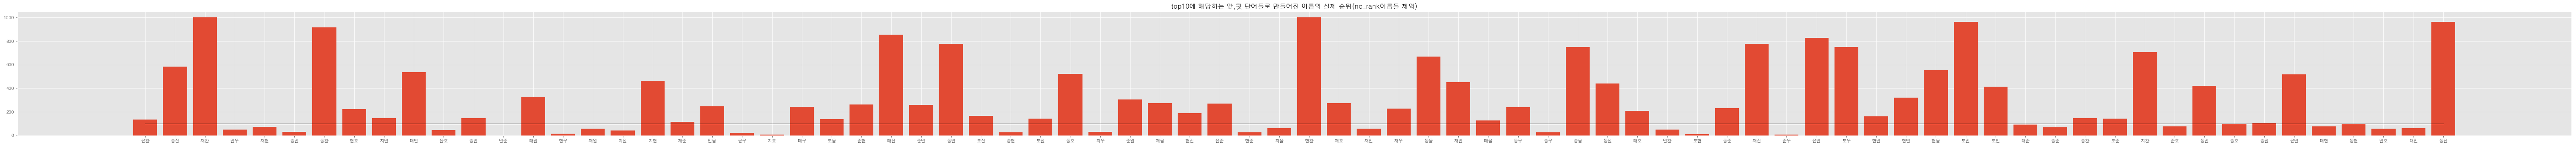

생성된 이름 총갯수 100
no_rank의 갯수: 22
생성된 이름 중 실제순위가 100위 안인 이름:  27
생성된 이름 중 실제순위가 100위 밖인 이름:  51
27 퍼센트의 상관관계를 따른다.
주관적인 분석: 
상관관계가 없다.


In [58]:
In100count=[]
Out100count=[]
value = []
value = []
for i in range(len(list(real_name15m))):
    value.append(100)
plt.title('top10에 해당하는 앞,뒷 단어들로 만들어진 이름의 실제 순위(no_rank이름들 제외)')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (100,5)
plt.rcParams['lines.linewidth'] = 1
plt.plot(list(real_name15m),value,color = 'black')
plt.bar(list(real_name15m),real_rank15m)
plt.show()
print('생성된 이름 총갯수',len(list_of_top10_combination15m))
print('no_rank의 갯수:',len(no_rank15m)) #1200등안에도 들지못한 이름
for i in range(len(real_rank15m)):
    if real_rank15m[i]<=100:
        In100count.append(real_rank15m[i])
    else:
        Out100count.append(real_rank15m[i])
print('생성된 이름 중 실제순위가 100위 안인 이름: ',len(In100count))
print('생성된 이름 중 실제순위가 100위 밖인 이름: ',len(Out100count))

relation(len(In100count))


In [35]:
#15년 여자이름으로 시험
import random
top10_f_15_front = [last_f_15_front[i][1] for i in range(10)]
top10_f_15_back = [last_f_15_back[i][1] for i in range(10)]
recommend_front15f = random.choice(top10_f_15_front)
recommend_back15f = random.choice(top10_f_15_back)
recommend_name15f = recommend_front15f+recommend_back15f
print("15년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: "+recommend_name15f)

#example
def compare(name):
    for i in range(len(fileMatrix15f)):
        if fileMatrix15f[i][0] == name:
            print("실제등수: "+ fileMatrix15f[i][1])
    if name not in [fileMatrix15f[i][0] for i in range(len(fileMatrix15f))]:
        print("해당이름 순위권에 없음")
compare(recommend_name15f)

#이름조합과정
list_of_top10_combination15f = [last_f_15_front[i][1]+last_f_15_back[j][1] for i in range(10) for j in range(10)]
name15f = [fileMatrix15f[i][0] for i in range(len(fileMatrix15f))] #15년도 여자이름들의 리스트
no_rank15f = [list_of_top10_combination15f[i] for i in range(len(list_of_top10_combination15f)) if list_of_top10_combination15f[i] not in name15f]
#print(list(no_rank)) #top10 앞,뒤 단어 조합시에 1200개의 순위에조차 없는 이름들
real_name15f = list(set(list_of_top10_combination15f)-set(no_rank15f))
real_rank15f =[int(dict_15f[real_name15f[i]]) for i in range(len(real_name15f))]

print(list(real_name15f))
print(real_rank15f)

15년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: 하아
해당이름 순위권에 없음
['예연', '혜영', '은빈', '서원', '하영', '예윤', '서빈', '다은', '혜빈', '은아', '지빈', '다하', '소빈', '예원', '서희', '은영', '지원', '예하', '지희', '지은', '혜은', '다연', '소아', '다희', '유아', '지영', '서영', '하희', '예영', '서연', '이연', '하연', '지윤', '소하', '이빈', '서아', '하이', '유이', '유영', '혜아', '지아', '유원', '은희', '혜원', '서윤', '이원', '예희', '유하', '소윤', '혜연', '이영', '소이', '서은', '유은', '유희', '예아', '다원', '소희', '예은', '예빈', '하윤', '하빈', '은하', '소영', '소은', '하은', '하원', '지하', '지이', '소원', '다영', '유연', '다윤', '혜윤', '이은', '소연', '서하', '서이', '유빈', '다빈', '지연']
[1028, 631, 281, 177, 102, 399, 197, 10, 289, 326, 558, 991, 603, 21, 76, 414, 25, 479, 307, 84, 525, 60, 897, 132, 636, 208, 40, 914, 455, 2, 914, 57, 14, 1100, 1152, 36, 350, 228, 1028, 1028, 9, 897, 689, 98, 1, 831, 643, 105, 16, 473, 991, 133, 33, 237, 491, 794, 186, 128, 23, 82, 5, 269, 303, 188, 49, 8, 368, 1064, 515, 196, 226, 831, 64, 252, 504, 80, 58, 320, 68, 135, 121]


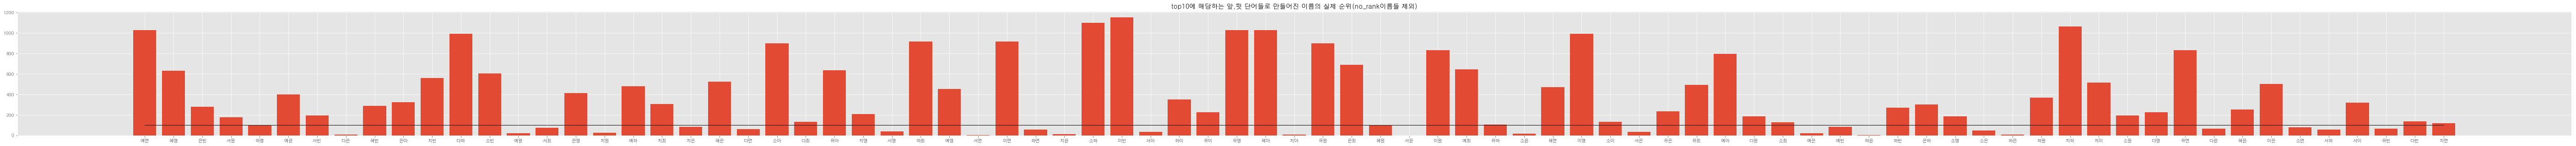

생성된 이름 총갯수 100
no_rank의 갯수: 19
생성된 이름 중 실제순위가 100위 안인 이름:  25
생성된 이름 중 실제순위가 100위 밖인 이름:  56
25 퍼센트의 상관관계를 따른다.
주관적인 분석: 
상관관계가 없다.


In [36]:
In100count=[]
Out100count=[]
value = []
for i in range(len(list(real_name15f))):
    value.append(100)
plt.title('top10에 해당하는 앞,뒷 단어들로 만들어진 이름의 실제 순위(no_rank이름들 제외)')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (100,5)
plt.rcParams['lines.linewidth'] = 1
plt.plot(list(real_name15f),value,color = 'black')

plt.bar(list(real_name15f),real_rank15f)
plt.show()
print('생성된 이름 총갯수',len(list_of_top10_combination15f))
print('no_rank의 갯수:',len(no_rank15f)) #1200등안에도 들지못한 이름
for i in range(len(real_rank15f)):
    if real_rank15f[i]<=100:
        In100count.append(real_rank15f[i])
    else:
        Out100count.append(real_rank15f[i])
print('생성된 이름 중 실제순위가 100위 안인 이름: ',len(In100count))
print('생성된 이름 중 실제순위가 100위 밖인 이름: ',len(Out100count))

relation(len(In100count))

In [37]:
#16년 남자이름으로 시험
import random
top10_m_16_front = [last_m_16_front[i][1] for i in range(10)]
top10_m_16_back = [last_m_16_back[i][1] for i in range(10)]
recommend_front16m = random.choice(top10_m_16_front)
recommend_back16m = random.choice(top10_m_16_back)
recommend_name16m = recommend_front16m+recommend_back16m
print("16년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: "+recommend_name16m)

#example
def compare(name):
    for i in range(len(fileMatrix16m)):
        if fileMatrix16m[i][0] == name:
            print("실제등수: "+ fileMatrix15f[i][1])
    if name not in [fileMatrix16m[i][0] for i in range(len(fileMatrix16m))]:
        print("해당이름 순위권에 없음")
compare(recommend_name16m)

#이름조합과정
list_of_top10_combination16m = [last_m_16_front[i][1]+last_m_16_back[j][1] for i in range(10) for j in range(10)]
name16m = [fileMatrix16m[i][0] for i in range(len(fileMatrix16m))] #16년도 남자이름들의 리스트
no_rank16m = [list_of_top10_combination16m[i] for i in range(len(list_of_top10_combination16m)) if list_of_top10_combination16m[i] not in name16m]
#print(list(no_rank)) #top10 앞,뒤 단어 조합시에 1200개의 순위에조차 없는 이름들
real_name16m = list(set(list_of_top10_combination16m)-set(no_rank16m))
real_rank16m =[int(dict_16m[real_name16m[i]]) for i in range(len(real_name16m))]

print(list(real_name16m))
print(real_rank16m)


16년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: 승민
실제등수: 45
['윤찬', '윤진', '승진', '민우', '재현', '승민', '지빈', '유준', '지민', '태빈', '윤호', '승빈', '민준', '태원', '재원', '지원', '지현', '재준', '민율', '유현', '윤우', '준빈', '지호', '태우', '도율', '준현', '태진', '준민', '민호', '동빈', '도진', '승현', '도원', '동호', '지우', '준원', '재율', '윤준', '지율', '유원', '재호', '재민', '재우', '동율', '재빈', '유진', '태율', '동우', '승우', '승율', '유찬', '태호', '유호', '민찬', '도현', '동준', '재진', '준우', '윤빈', '도우', '도민', '도빈', '태준', '승준', '승찬', '도준', '지찬', '준호', '동민', '승호', '승원', '유민', '윤민', '태현', '동현', '유빈', '동원', '태민', '동진']
[145, 1152, 643, 52, 75, 45, 973, 10, 171, 425, 60, 135, 1, 346, 53, 39, 580, 121, 303, 193, 22, 991, 8, 227, 100, 307, 778, 350, 74, 594, 166, 33, 102, 439, 37, 277, 265, 255, 66, 1100, 257, 70, 221, 594, 473, 190, 126, 221, 29, 831, 31, 210, 409, 57, 12, 243, 897, 9, 717, 812, 1064, 346, 103, 96, 186, 117, 914, 95, 548, 106, 109, 247, 731, 93, 116, 219, 479, 56, 747]


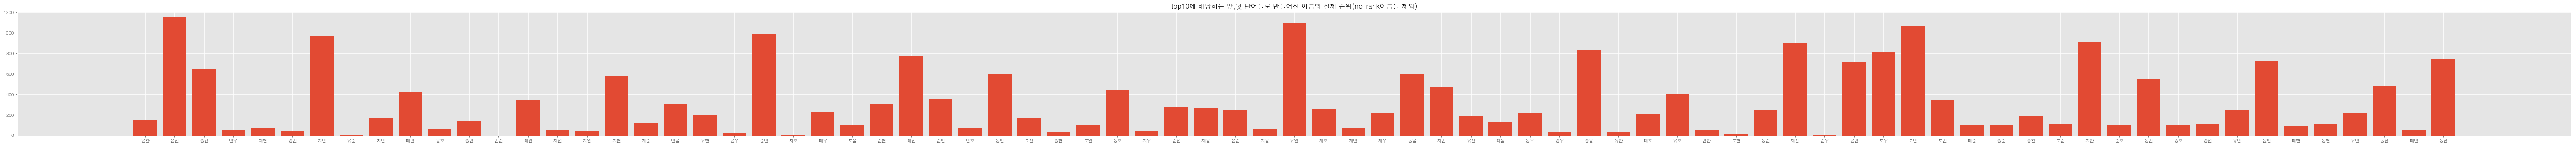

생성된 이름 총갯수 100
no_rank의 갯수: 21
생성된 이름 중 실제순위가 100위 안인 이름:  25
생성된 이름 중 실제순위가 100위 밖인 이름:  54
25 퍼센트의 상관관계를 따른다.
주관적인 분석: 
상관관계가 없다.


In [38]:
In100count=[]
Out100count=[]
value = []
for i in range(len(list(real_name16m))):
    value.append(100)
plt.title('top10에 해당하는 앞,뒷 단어들로 만들어진 이름의 실제 순위(no_rank이름들 제외)')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (100,5)
plt.rcParams['lines.linewidth'] = 1
plt.plot(list(real_name16m),value,color = 'black')
plt.bar(list(real_name16m),real_rank16m)
plt.show()
print('생성된 이름 총갯수',len(list_of_top10_combination16m))
print('no_rank의 갯수:',len(no_rank16m)) #1200등안에도 들지못한 이름
for i in range(len(real_rank16m)):
    if real_rank16m[i]<=100:
        In100count.append(real_rank16m[i])
    else:
        Out100count.append(real_rank16m[i])
print('생성된 이름 중 실제순위가 100위 안인 이름: ',len(In100count))
print('생성된 이름 중 실제순위가 100위 밖인 이름: ',len(Out100count))

relation(len(In100count))

In [39]:
#16년 여자이름으로 시험
import random
top10_f_16_front = [last_f_16_front[i][1] for i in range(10)]
top10_f_16_back = [last_f_16_back[i][1] for i in range(10)]
recommend_front16f = random.choice(top10_f_16_front)
recommend_back16f = random.choice(top10_f_16_back)
recommend_name16f = recommend_front16f+recommend_back16f
print("16년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: "+recommend_name16f)

#example
def compare(name):
    for i in range(len(fileMatrix16f)):
        if fileMatrix16f[i][0] == name:
            print("실제등수: "+ fileMatrix16f[i][1])
    if name not in [fileMatrix16f[i][0] for i in range(len(fileMatrix16f))]:
        print("해당이름 순위권에 없음")
compare(recommend_name16f)

#이름조합과정
list_of_top10_combination16f = [last_f_16_front[i][1]+last_f_16_back[j][1] for i in range(10) for j in range(10)]
name16f = [fileMatrix16f[i][0] for i in range(len(fileMatrix16f))] #16년도 여자이름들의 리스트
no_rank16f = [list_of_top10_combination16f[i] for i in range(len(list_of_top10_combination16f)) if list_of_top10_combination16f[i] not in name16f]
#print(list(no_rank)) #top10 앞,뒤 단어 조합시에 1200개의 순위에조차 없는 이름들
real_name16f = list(set(list_of_top10_combination16f)-set(no_rank16f))
real_rank16f =[int(dict_16f[real_name16f[i]]) for i in range(len(real_name16f))]

print(list(real_name16f))
print(real_rank16f)

16년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: 해희
해당이름 순위권에 없음
['유영', '혜아', '지아', '예연', '서경', '은희', '은빈', '서윤', '혜영', '이윤', '유하', '예희', '혜연', '하영', '예윤', '서빈', '다은', '유경', '유은', '유희', '혜빈', '지빈', '은아', '혜경', '서은', '예아', '해빈', '다하', '해영', '해은', '예은', '예빈', '하윤', '하빈', '다경', '은하', '서희', '은영', '예하', '하은', '지희', '해아', '지은', '혜은', '은경', '다연', '다희', '지이', '하경', '다영', '유아', '지영', '유연', '서영', '다윤', '혜윤', '이은', '서하', '이경', '예영', '서연', '이연', '서이', '하연', '예경', '이빈', '지윤', '해윤', '서아', '해연', '유빈', '하이', '유이', '다빈', '지연']
[934, 1022, 7, 1154, 441, 616, 269, 1, 600, 1062, 87, 685, 490, 86, 400, 179, 12, 327, 208, 514, 305, 670, 336, 1022, 31, 749, 646, 983, 983, 906, 26, 82, 3, 300, 235, 290, 94, 454, 446, 6, 335, 1062, 97, 572, 766, 55, 131, 562, 375, 257, 616, 260, 670, 61, 68, 300, 460, 37, 906, 490, 2, 860, 329, 48, 983, 1113, 19, 441, 18, 883, 71, 327, 195, 147, 133]


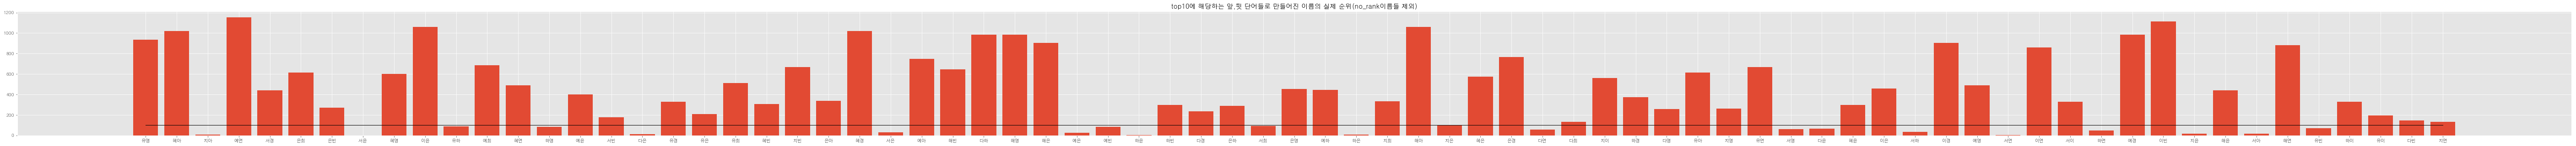

생성된 이름 총갯수 100
no_rank의 갯수: 25
생성된 이름 중 실제순위가 100위 안인 이름:  21
생성된 이름 중 실제순위가 100위 밖인 이름:  54
21 퍼센트의 상관관계를 따른다.
주관적인 분석: 
상관관계가 없다.


In [40]:
In100count=[]
Out100count=[]
value = []
for i in range(len(list(real_name16f))):
    value.append(100)
plt.title('top10에 해당하는 앞,뒷 단어들로 만들어진 이름의 실제 순위(no_rank이름들 제외)')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (100,5)
plt.rcParams['lines.linewidth'] = 1
plt.plot(list(real_name16f),value,color = 'black')
plt.bar(list(real_name16f),real_rank16f)
plt.show()
print('생성된 이름 총갯수',len(list_of_top10_combination16f))
print('no_rank의 갯수:',len(no_rank16f)) #1200등안에도 들지못한 이름
for i in range(len(real_rank16f)):
    if real_rank16f[i]<=100:
        In100count.append(real_rank16f[i])
    else:
        Out100count.append(real_rank16f[i])
print('생성된 이름 중 실제순위가 100위 안인 이름: ',len(In100count))
print('생성된 이름 중 실제순위가 100위 밖인 이름: ',len(Out100count))

relation(len(In100count))

In [41]:
#17년 남자이름으로 시험
import random
top10_m_17_front = [last_m_17_front[i][1] for i in range(10)]
top10_m_17_back = [last_m_17_back[i][1] for i in range(10)]
recommend_front17m = random.choice(top10_m_17_front)
recommend_back17m = random.choice(top10_m_17_back)
recommend_name17m = recommend_front17m+recommend_back17m
print("17년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: "+recommend_name17m)

#example
def compare(name):
    for i in range(len(fileMatrix17m)):
        if fileMatrix17m[i][0] == name:
            print("실제등수: "+ fileMatrix17m[i][1])
    if name not in [fileMatrix17m[i][0] for i in range(len(fileMatrix17m))]:
        print("해당이름 순위권에 없음")
compare(recommend_name17m)

#이름조합과정
list_of_top10_combination17m = [last_m_17_front[i][1]+last_m_17_back[j][1] for i in range(10) for j in range(10)]
name17m = [fileMatrix17m[i][0] for i in range(len(fileMatrix17m))] #17년도 남자이름들의 리스트
no_rank17m = [list_of_top10_combination17m[i] for i in range(len(list_of_top10_combination17m)) if list_of_top10_combination17m[i] not in name17m]
#print(list(no_rank)) #top10 앞,뒤 단어 조합시에 1200개의 순위에조차 없는 이름들
real_name17m = list(set(list_of_top10_combination17m)-set(no_rank17m))
real_rank17m =[int(dict_17m[real_name17m[i]]) for i in range(len(real_name17m))]

print(list(real_name17m))
print(real_rank17m)

17년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: 윤진
해당이름 순위권에 없음
['윤찬', '승진', '재찬', '민우', '재현', '승민', '지빈', '동찬', '유준', '지민', '태빈', '윤호', '승빈', '민준', '태원', '재원', '지원', '지현', '재준', '민율', '유현', '윤우', '준빈', '지호', '태우', '도율', '준현', '태진', '준민', '민호', '동빈', '도진', '승현', '도원', '동호', '지우', '준원', '재율', '윤준', '지율', '유원', '재호', '재민', '재우', '동율', '재빈', '유진', '태율', '동우', '승우', '승율', '유찬', '태호', '유호', '민찬', '도현', '동준', '재진', '준우', '윤빈', '도우', '도민', '도빈', '태준', '승준', '승찬', '도준', '지찬', '준호', '동민', '승호', '승원', '유민', '윤민', '태현', '동현', '민진', '유빈', '동원', '태민', '동진']
[168, 725, 1155, 61, 85, 64, 812, 940, 8, 184, 462, 56, 119, 5, 366, 68, 57, 503, 131, 304, 147, 20, 1032, 9, 251, 95, 397, 712, 352, 63, 645, 195, 42, 105, 420, 36, 360, 264, 277, 62, 734, 292, 83, 248, 687, 516, 225, 115, 241, 27, 895, 37, 219, 344, 79, 16, 280, 1064, 10, 712, 481, 967, 344, 110, 87, 208, 133, 630, 100, 514, 127, 137, 222, 687, 121, 149, 1155, 261, 525, 128, 812]


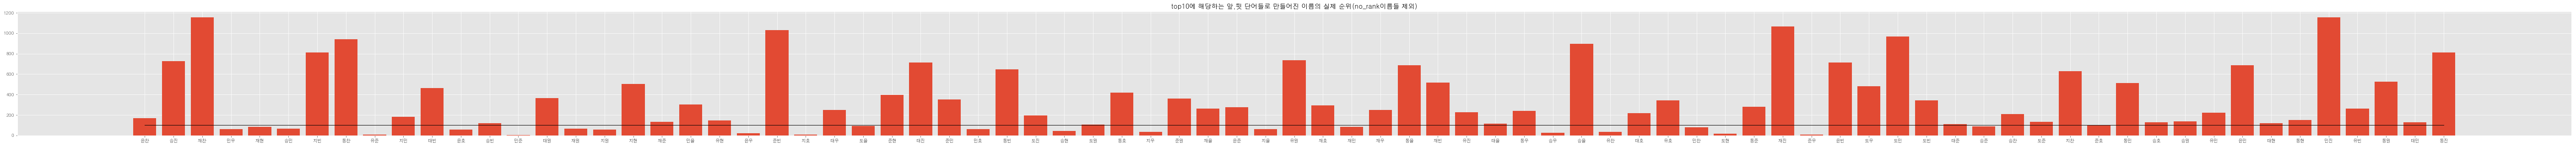

생성된 이름 총갯수 100
no_rank의 갯수: 19
생성된 이름 중 실제순위가 100위 안인 이름:  23
생성된 이름 중 실제순위가 100위 밖인 이름:  58
23 퍼센트의 상관관계를 따른다.
주관적인 분석: 
상관관계가 없다.


In [42]:
In100count=[]
Out100count=[]
value = []
for i in range(len(list(real_name17m))):
    value.append(100)
plt.title('top10에 해당하는 앞,뒷 단어들로 만들어진 이름의 실제 순위(no_rank이름들 제외)')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (100,5)
plt.rcParams['lines.linewidth'] = 1
plt.plot(list(real_name17m),value,color = 'black')

plt.bar(list(real_name17m),real_rank17m)
plt.show()
print('생성된 이름 총갯수',len(list_of_top10_combination17m))
print('no_rank의 갯수:',len(no_rank17m)) #1200등안에도 들지못한 이름
for i in range(len(real_rank17m)):
    if real_rank17m[i]<=100:
        In100count.append(real_rank17m[i])
    else:
        Out100count.append(real_rank17m[i])
print('생성된 이름 중 실제순위가 100위 안인 이름: ',len(In100count))
print('생성된 이름 중 실제순위가 100위 밖인 이름: ',len(Out100count))

relation(len(In100count))

In [43]:
#17년 여자이름으로 시험
import random
top10_f_17_front = [last_f_17_front[i][1] for i in range(10)]
top10_f_17_back = [last_f_17_back[i][1] for i in range(10)]
recommend_front17f = random.choice(top10_f_17_front)
recommend_back17f = random.choice(top10_f_17_back)
recommend_name17f = recommend_front17f+recommend_back17f
print("16년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: "+recommend_name17f)

#example
def compare(name):
    for i in range(len(fileMatrix17f)):
        if fileMatrix17f[i][0] == name:
            print("실제등수: "+ fileMatrix17f[i][1])
    if name not in [fileMatrix17f[i][0] for i in range(len(fileMatrix17f))]:
        print("해당이름 순위권에 없음")
compare(recommend_name17f)

#이름조합과정
list_of_top10_combination17f = [last_f_17_front[i][1]+last_f_17_back[j][1] for i in range(10) for j in range(10)]
name17f = [fileMatrix17f[i][0] for i in range(len(fileMatrix17f))] #17년도 여자이름들의 리스트
no_rank17f = [list_of_top10_combination17f[i] for i in range(len(list_of_top10_combination17f)) if list_of_top10_combination17f[i] not in name17f]
#print(list(no_rank)) #top10 앞,뒤 단어 조합시에 1200개의 순위에조차 없는 이름들
real_name17f = list(set(list_of_top10_combination17f)-set(no_rank17f))
real_rank17f =[int(dict_17f[real_name17f[i]]) for i in range(len(real_name17f))]

print(list(real_name17f))
print(real_rank17f)

16년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: 지원
실제등수: 38
['예연', '혜영', '은빈', '서원', '하영', '예윤', '서빈', '다은', '혜빈', '은아', '지빈', '다하', '소빈', '예원', '서희', '은영', '지원', '예하', '지희', '지은', '혜은', '다연', '다희', '유아', '지영', '서영', '하희', '예영', '서연', '이연', '하연', '지윤', '소하', '이빈', '서아', '하이', '유이', '유영', '혜아', '지아', '유원', '은희', '서윤', '혜원', '이원', '예희', '유하', '소윤', '혜연', '이영', '소이', '서은', '유은', '유희', '예아', '다원', '소희', '예은', '예빈', '하윤', '하빈', '은하', '소영', '소은', '하은', '하원', '지이', '소원', '다영', '유연', '다윤', '혜윤', '이은', '소연', '서하', '서이', '유빈', '다빈', '지연']
[928, 721, 257, 182, 84, 448, 168, 12, 284, 350, 619, 1124, 518, 48, 88, 595, 38, 491, 385, 93, 619, 53, 148, 510, 270, 79, 998, 506, 3, 1068, 30, 25, 619, 1124, 10, 369, 155, 661, 893, 9, 675, 757, 2, 146, 866, 661, 70, 20, 510, 961, 85, 37, 193, 552, 816, 181, 137, 32, 101, 1, 230, 262, 319, 57, 4, 401, 562, 216, 255, 457, 58, 347, 433, 114, 33, 267, 71, 140, 150]


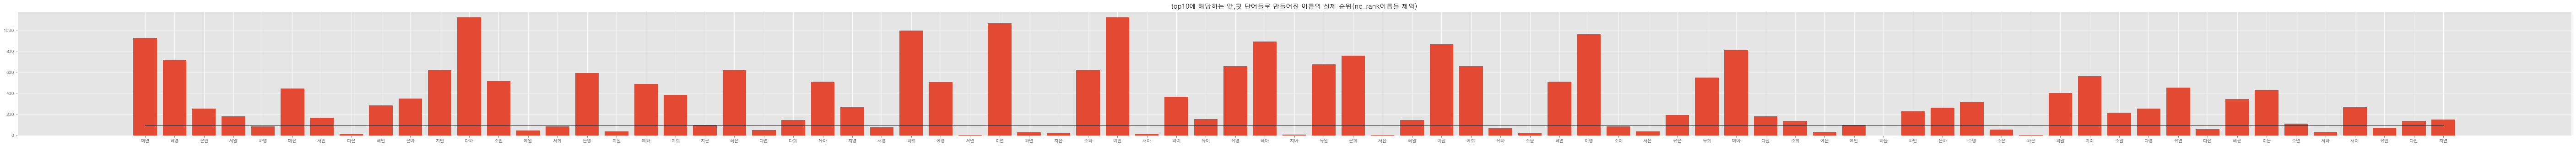

생성된 이름 총갯수 100
no_rank의 갯수: 21
생성된 이름 중 실제순위가 100위 안인 이름:  25
생성된 이름 중 실제순위가 100위 밖인 이름:  54
25 퍼센트의 상관관계를 따른다.
주관적인 분석: 
상관관계가 없다.


In [44]:
In100count=[]
Out100count=[]
value = []
for i in range(len(list(real_name17f))):
    value.append(100)
plt.title('top10에 해당하는 앞,뒷 단어들로 만들어진 이름의 실제 순위(no_rank이름들 제외)')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (100,5)
plt.rcParams['lines.linewidth'] = 1
plt.plot(list(real_name17f),value,color = 'black')

plt.bar(list(real_name17f),real_rank17f)
plt.show()
print('생성된 이름 총갯수',len(list_of_top10_combination17f))
print('no_rank의 갯수:',len(no_rank17f)) #1200등안에도 들지못한 이름
for i in range(len(real_rank17f)):
    if real_rank17f[i]<=100:
        In100count.append(real_rank17f[i])
    else:
        Out100count.append(real_rank17f[i])
print('생성된 이름 중 실제순위가 100위 안인 이름: ',len(In100count))
print('생성된 이름 중 실제순위가 100위 밖인 이름: ',len(Out100count))

relation(len(In100count))

In [45]:
#18년 남자이름으로 시험
import random
top10_m_18_front = [last_m_18_front[i][1] for i in range(10)]
top10_m_18_back = [last_m_18_back[i][1] for i in range(10)]
recommend_front18m = random.choice(top10_m_18_front)
recommend_back18m = random.choice(top10_m_18_back)
recommend_name18m = recommend_front18m+recommend_back18m
print("18년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: "+recommend_name18m)

#example
def compare(name):
    for i in range(len(fileMatrix18m)):
        if fileMatrix18m[i][0] == name:
            print("실제등수: "+ fileMatrix18m[i][1])
    if name not in [fileMatrix18m[i][0] for i in range(len(fileMatrix18m))]:
        print("해당이름 순위권에 없음")
compare(recommend_name18m)

#이름조합과정
list_of_top10_combination18m = [last_f_16_front[i][1]+last_m_18_back[j][1] for i in range(10) for j in range(10)]
name18m = [fileMatrix18m[i][0] for i in range(len(fileMatrix18m))] #18년도 남자이름들의 리스트
no_rank18m = [list_of_top10_combination18m[i] for i in range(len(list_of_top10_combination18m)) if list_of_top10_combination18m[i] not in name18m]
#print(list(no_rank)) #top10 앞,뒤 단어 조합시에 1200개의 순위에조차 없는 이름들
real_name18m = list(set(list_of_top10_combination18m)-set(no_rank18m))
real_rank18m =[int(dict_18m[real_name18m[i]]) for i in range(len(real_name18m))]

print(list(real_name18m))
print(real_rank18m)

18년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: 준민
실제등수: 353
['하민', '지율', '유원', '서호', '은빈', '이원', '서원', '하현', '서빈', '다호', '지빈', '유진', '이준', '예현', '다원', '유준', '지민', '다민', '하빈', '은준', '유찬', '서현', '유호', '지원', '하진', '지현', '이찬', '서우', '서준', '유현', '하원', '서찬', '다준', '지호', '예찬', '은율', '이율', '은우', '해원', '해찬', '해율', '다율', '해진', '다현', '은호', '서율', '지찬', '하율', '혜준', '해민', '유민', '하준', '지우', '해준', '은찬', '유빈', '이현', '서진', '예준', '다빈']
[44, 58, 792, 114, 1080, 768, 101, 884, 187, 960, 1043, 151, 22, 666, 188, 10, 132, 458, 301, 210, 34, 344, 360, 51, 35, 522, 273, 38, 1, 169, 640, 590, 792, 6, 106, 222, 1130, 9, 590, 556, 814, 336, 864, 546, 48, 92, 666, 64, 566, 685, 222, 2, 33, 286, 78, 224, 72, 11, 7, 498]


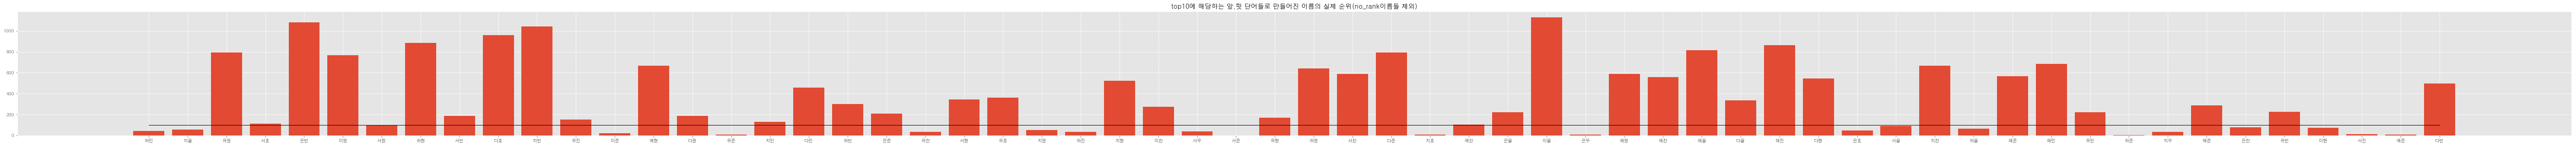

생성된 이름 총갯수 100
no_rank의 갯수: 40
생성된 이름 중 실제순위가 100위 안인 이름:  20
생성된 이름 중 실제순위가 100위 밖인 이름:  40
20 퍼센트의 상관관계를 따른다.
주관적인 분석: 
상관관계가 없다.


In [46]:
In100count=[]
Out100count=[]
value = []
for i in range(len(list(real_name18m))):
    value.append(100)
plt.title('top10에 해당하는 앞,뒷 단어들로 만들어진 이름의 실제 순위(no_rank이름들 제외)')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (100,5)
plt.rcParams['lines.linewidth'] = 1
plt.plot(list(real_name18m),value,color = 'black')


plt.bar(list(real_name18m),real_rank18m)
plt.show()
print('생성된 이름 총갯수',len(list_of_top10_combination18m))
print('no_rank의 갯수:',len(no_rank18m)) #1200등안에도 들지못한 이름
for i in range(len(real_rank18m)):
    if real_rank18m[i]<=100:
        In100count.append(real_rank18m[i])
    else:
        Out100count.append(real_rank18m[i])
print('생성된 이름 중 실제순위가 100위 안인 이름: ',len(In100count))
print('생성된 이름 중 실제순위가 100위 밖인 이름: ',len(Out100count))

relation(len(In100count))

In [47]:
#18년 여자이름으로 시험
import random
top10_f_18_front = [last_f_18_front[i][1] for i in range(10)]
top10_f_18_back = [last_f_18_back[i][1] for i in range(10)]
recommend_front18f = random.choice(top10_f_18_front)
recommend_back18f = random.choice(top10_f_18_back)
recommend_name18f = recommend_front18f+recommend_back18f
print("18년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: "+recommend_name18f)

#example
def compare(name):
    for i in range(len(fileMatrix18f)):
        if fileMatrix18f[i][0] == name:
            print("실제등수: "+ fileMatrix18f[i][1])
    if name not in [fileMatrix18f[i][0] for i in range(len(fileMatrix18f))]:
        print("해당이름 순위권에 없음")
compare(recommend_name18f)

#이름조합과정
list_of_top10_combination18f = [last_f_18_front[i][1]+last_f_18_back[j][1] for i in range(10) for j in range(10)]
name18f = [fileMatrix18f[i][0] for i in range(len(fileMatrix18f))] #18년도 여자이름들의 리스트
no_rank18f = [list_of_top10_combination18f[i] for i in range(len(list_of_top10_combination18f)) if list_of_top10_combination18f[i] not in name18f]
#print(list(no_rank)) #top10 앞,뒤 단어 조합시에 1200개의 순위에조차 없는 이름들
real_name18f = list(set(list_of_top10_combination18f)-set(no_rank18f))
real_rank18f =[int(dict_18f[real_name18f[i]]) for i in range(len(real_name18f))]

print(list(real_name18f))
print(real_rank18f)

18년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: 예희
실제등수: 832
['예연', '혜영', '은빈', '하영', '예윤', '서빈', '다은', '혜빈', '은아', '지빈', '하나', '다하', '소빈', '서희', '은영', '예하', '지희', '지은', '혜은', '다연', '소아', '다희', '유아', '지영', '서영', '하희', '예영', '서연', '이연', '하연', '지윤', '소하', '서아', '하이', '유이', '유영', '혜아', '지아', '은희', '서윤', '예희', '유하', '소윤', '혜연', '이영', '소이', '혜나', '서은', '유은', '유희', '예아', '소희', '예은', '예빈', '하윤', '하빈', '예나', '은하', '소영', '소은', '하은', '다나', '지나', '지이', '다영', '유연', '다윤', '혜윤', '소연', '서하', '이은', '서이', '유빈', '지연', '유나', '다빈', '이나']
[1121, 762, 270, 100, 440, 147, 14, 348, 338, 735, 92, 901, 476, 89, 629, 451, 427, 75, 806, 55, 979, 138, 431, 311, 95, 979, 588, 7, 762, 44, 25, 697, 2, 323, 155, 608, 1069, 11, 735, 4, 832, 48, 27, 558, 1069, 78, 337, 33, 178, 509, 832, 162, 36, 101, 3, 237, 32, 268, 284, 52, 5, 436, 484, 662, 241, 493, 61, 370, 116, 23, 373, 271, 81, 183, 29, 133, 162]


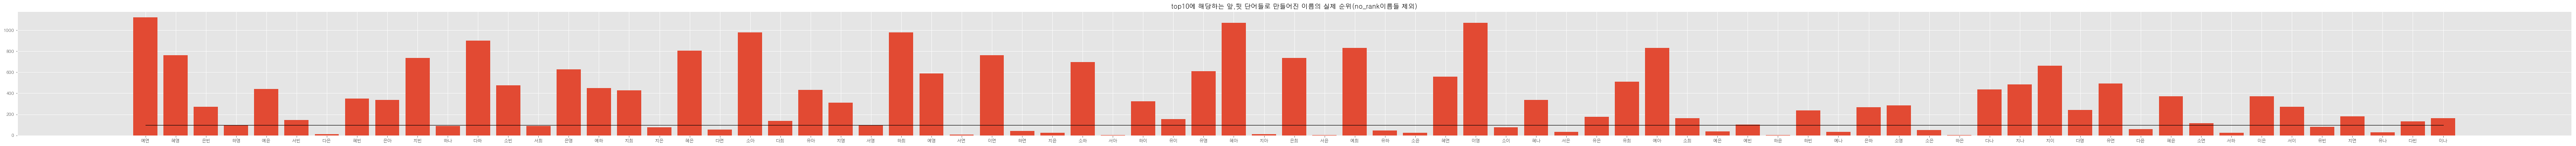

생성된 이름 총갯수 100
no_rank의 갯수: 23
생성된 이름 중 실제순위가 100위 안인 이름:  26
생성된 이름 중 실제순위가 100위 밖인 이름:  51
26 퍼센트의 상관관계를 따른다.
주관적인 분석: 
상관관계가 없다.


In [48]:
In100count=[]
Out100count=[]
value = []
for i in range(len(list(real_name18f))):
    value.append(100)
plt.title('top10에 해당하는 앞,뒷 단어들로 만들어진 이름의 실제 순위(no_rank이름들 제외)')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (100,5)
plt.rcParams['lines.linewidth'] = 1
plt.plot(list(real_name18f),value,color = 'black')
plt.bar(list(real_name18f),real_rank18f)
plt.show()
print('생성된 이름 총갯수',len(list_of_top10_combination18f))
print('no_rank의 갯수:',len(no_rank18f)) #1200등안에도 들지못한 이름
for i in range(len(real_rank18f)):
    if real_rank18f[i]<=100:
        In100count.append(real_rank18f[i])
    else:
        Out100count.append(real_rank18f[i])
print('생성된 이름 중 실제순위가 100위 안인 이름: ',len(In100count))
print('생성된 이름 중 실제순위가 100위 밖인 이름: ',len(Out100count))

relation(len(In100count))

In [49]:
#19년 남자이름으로 시험
import random
top10_m_19_front = [last_m_19_front[i][1] for i in range(10)]
top10_m_19_back = [last_m_19_back[i][1] for i in range(10)]
recommend_front19m = random.choice(top10_m_19_front)
recommend_back19m = random.choice(top10_m_19_back)
recommend_name19m = recommend_front19m+recommend_back19m
print("19년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: "+recommend_name19m)

#example
def compare(name):
    for i in range(len(fileMatrix19m)):
        if fileMatrix19m[i][0] == name:
            print("실제등수: "+ fileMatrix19m[i][1])
    if name not in [fileMatrix19m[i][0] for i in range(len(fileMatrix19m))]:
        print("해당이름 순위권에 없음")
compare(recommend_name19m)

#이름조합과정
list_of_top10_combination19m = [last_m_19_front[i][1]+last_m_19_back[j][1] for i in range(10) for j in range(10)]
name19m = [fileMatrix19m[i][0] for i in range(len(fileMatrix19m))] #19년도 남자이름들의 리스트
no_rank19m = [list_of_top10_combination19m[i] for i in range(len(list_of_top10_combination19m)) if list_of_top10_combination19m[i] not in name19m]
#print(list(no_rank)) #top10 앞,뒤 단어 조합시에 1200개의 순위에조차 없는 이름들
real_name19m = list(set(list_of_top10_combination19m)-set(no_rank19m))
real_rank19m =[int(dict_19m[real_name19m[i]]) for i in range(len(real_name19m))]

print(list(real_name19m))
print(real_rank19m)

19년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: 태민
실제등수: 112
['하민', '윤찬', '민우', '재현', '승민', '지빈', '도호', '현호', '지민', '태빈', '윤호', '승빈', '민준', '태원', '현우', '재원', '지원', '지현', '재준', '민율', '도윤', '윤우', '준빈', '지호', '태우', '도율', '준현', '준민', '승현', '도원', '지우', '하준', '준원', '지윤', '재율', '윤준', '현준', '지율', '현찬', '재호', '재민', '하현', '재우', '재윤', '민현', '재빈', '태율', '승우', '승율', '하윤', '하빈', '태윤', '태호', '민찬', '도현', '준우', '윤빈', '승윤', '하원', '도우', '현민', '현빈', '현율', '도민', '도빈', '태준', '승준', '승찬', '도준', '지찬', '준호', '승호', '승원', '하율', '윤민', '태현', '민호', '태민']
[54, 135, 80, 132, 93, 631, 1071, 337, 87, 379, 61, 154, 7, 436, 27, 84, 69, 530, 127, 253, 4, 21, 973, 8, 280, 62, 400, 466, 65, 127, 38, 2, 316, 406, 286, 230, 47, 59, 873, 321, 76, 973, 264, 53, 1071, 406, 110, 32, 750, 193, 271, 50, 216, 82, 19, 13, 556, 163, 750, 800, 225, 308, 631, 873, 253, 100, 107, 211, 80, 1071, 132, 160, 175, 70, 702, 123, 98, 112]


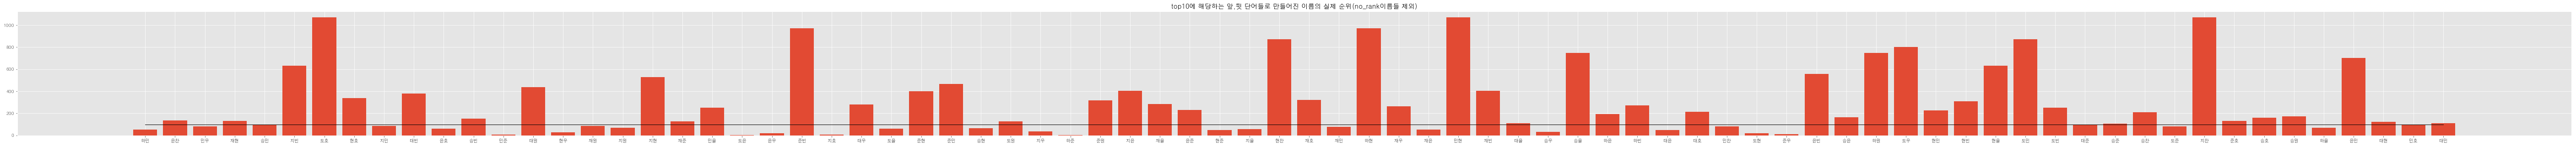

생성된 이름 총갯수 100
no_rank의 갯수: 22
생성된 이름 중 실제순위가 100위 안인 이름:  29
생성된 이름 중 실제순위가 100위 밖인 이름:  49
29 퍼센트의 상관관계를 따른다.
주관적인 분석: 
상관관계가 없다.


In [50]:
In100count=[]
Out100count=[]
value = []
for i in range(len(list(real_name19m))):
    value.append(100)
plt.title('top10에 해당하는 앞,뒷 단어들로 만들어진 이름의 실제 순위(no_rank이름들 제외)')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (100,5)
plt.rcParams['lines.linewidth'] = 1
plt.plot(list(real_name19m),value,color = 'black')
plt.bar(list(real_name19m),real_rank19m)
plt.show()
print('생성된 이름 총갯수',len(list_of_top10_combination19m))
print('no_rank의 갯수:',len(no_rank19m)) #1200등안에도 들지못한 이름
for i in range(len(real_rank19m)):
    if real_rank19m[i]<=100:
        In100count.append(real_rank19m[i])
    else:
        Out100count.append(real_rank19m[i])
print('생성된 이름 중 실제순위가 100위 안인 이름: ',len(In100count))
print('생성된 이름 중 실제순위가 100위 밖인 이름: ',len(Out100count))

relation(len(In100count))

In [51]:
#19년 여자이름으로 시험
import random
top10_f_19_front = [last_f_19_front[i][1] for i in range(10)]
top10_f_19_back = [last_f_19_back[i][1] for i in range(10)]
recommend_front19f = random.choice(top10_f_19_front)
recommend_back19f = random.choice(top10_f_19_back)
recommend_name19f = recommend_front19f+recommend_back19f
print("19년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: "+recommend_name19f)

#example
def compare(name):
    for i in range(len(fileMatrix19f)):
        if fileMatrix19f[i][0] == name:
            print("실제등수: "+ fileMatrix19f[i][1])
    if name not in [fileMatrix19f[i][0] for i in range(len(fileMatrix19f))]:
        print("해당이름 순위권에 없음")
compare(recommend_name19f)

#이름조합과정
list_of_top10_combination19f = [last_f_19_front[i][1]+last_f_19_back[j][1] for i in range(10) for j in range(10)]
name19f = [fileMatrix19f[i][0] for i in range(len(fileMatrix19f))] #19년도 여자이름들의 리스트
no_rank19f = [list_of_top10_combination19f[i] for i in range(len(list_of_top10_combination19f)) if list_of_top10_combination19f[i] not in name19f]
#print(list(no_rank)) #top10 앞,뒤 단어 조합시에 1200개의 순위에조차 없는 이름들
real_name19f = list(set(list_of_top10_combination19f)-set(no_rank19f))
real_rank19f =[int(dict_19f[real_name19f[i]]) for i in range(len(real_name19f))]

print(list(real_name19f))
print(real_rank19f)

19년에 인기있던 앞,뒤 글자를 랜덤으로 배열해 만든 이름: 은아
실제등수: 302
['예연', '혜영', '은빈', '하영', '예윤', '다은', '혜빈', '은아', '지빈', '하나', '소빈', '은영', '예하', '지희', '지은', '혜은', '다연', '소아', '다희', '유아', '지영', '예영', '이연', '하연', '지윤', '소하', '이빈', '다이', '하이', '유이', '아빈', '유영', '혜아', '지아', '은희', '예희', '유하', '소윤', '혜연', '이영', '아나', '소이', '혜나', '유은', '유희', '아윤', '예아', '아희', '소희', '예은', '예빈', '아연', '하윤', '하빈', '예나', '은하', '소영', '아은', '소은', '하은', '다나', '지나', '지하', '지이', '다영', '유연', '다윤', '혜윤', '소연', '이은', '유빈', '아영', '이나', '유나', '다빈', '지연']
[1022, 593, 292, 114, 364, 14, 378, 302, 706, 86, 467, 517, 433, 354, 99, 656, 54, 625, 165, 378, 309, 746, 625, 63, 29, 894, 894, 1022, 323, 155, 543, 565, 894, 11, 625, 1022, 47, 21, 565, 894, 809, 65, 319, 168, 543, 25, 894, 1022, 196, 40, 90, 218, 2, 227, 18, 245, 309, 809, 43, 4, 397, 419, 1022, 746, 296, 593, 59, 309, 148, 354, 113, 119, 138, 28, 151, 217]


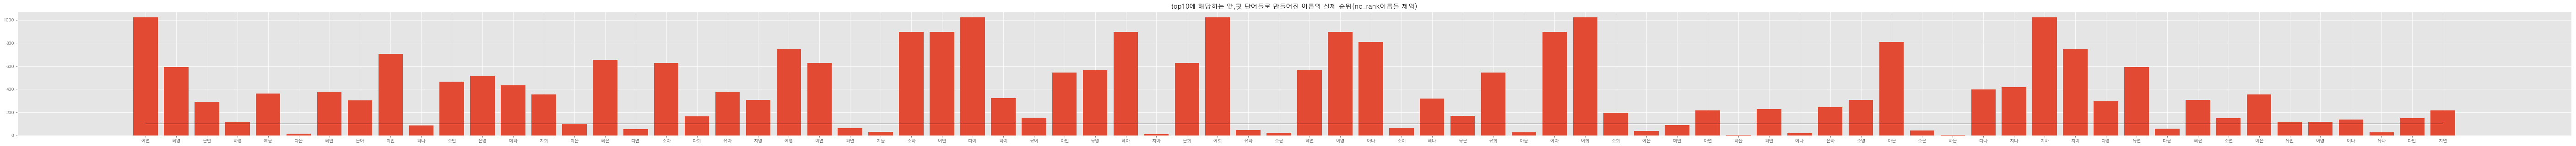

생성된 이름 총갯수 100
no_rank의 갯수: 24
생성된 이름 중 실제순위가 100위 안인 이름:  19
생성된 이름 중 실제순위가 100위 밖인 이름:  57
19 퍼센트의 상관관계를 따른다.
주관적인 분석: 
상관관계가 없다.


In [52]:
In100count=[]
Out100count=[]
value = []
for i in range(len(list(real_name19f))):
    value.append(100)
plt.title('top10에 해당하는 앞,뒷 단어들로 만들어진 이름의 실제 순위(no_rank이름들 제외)')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (100,5)
plt.rcParams['lines.linewidth'] = 1
plt.plot(list(real_name19f),value,color = 'black')
plt.bar(list(real_name19f),real_rank19f)
plt.show()
print('생성된 이름 총갯수',len(list_of_top10_combination19f))
print('no_rank의 갯수:',len(no_rank19f)) #1200등안에도 들지못한 이름
for i in range(len(real_rank19f)):
    if real_rank19f[i]<=100:
        In100count.append(real_rank19f[i])
    else:
        Out100count.append(real_rank19f[i])
print('생성된 이름 중 실제순위가 100위 안인 이름: ',len(In100count))
print('생성된 이름 중 실제순위가 100위 밖인 이름: ',len(Out100count))

relation(len(In100count))

## 6) 가설1의 결론 및 분석##
검은 선(실제순위 100)을 기준으로 밑에 있는 막대그래프의 이름들은 실제로 랭킹이 100위안에 든 이름이지만 대략적인 눈대중으로 확인해도 검은 선을 넘어서는 막대그래프들이 많았다.<br>
상세히 분석해본 결과, 모든 년도의 남/녀 단어별 이름의 상관관계는 30퍼센트를 넘지 않았고 본인이 세웠던 70프로를 넘을것이라는 가설은 틀렸다. 

**글자의 인기도와 이름자체의 순위는 상관관계가 적다.**

# 가설 2
각 년마다 앞,뒤글자 top5의 비교분석으로 트렌드 흐름을 확인한다.

## 남자 앞글자 트렌드 추이

In [53]:
#15년도 앞글자 top5
print([last_m_15_front[i] for i in range(5)])
#16년도 앞글자 top5
print([last_m_16_front[i] for i in range(5)])
#17년도 앞글자 top5
print([last_m_17_front[i] for i in range(5)])
#18년도 앞글자 top5
print([last_m_18_front[i] for i in range(5)])
#19년도 앞글자 top5
print([last_m_19_front[i] for i in range(5)])

[[53, '태'], [45, '재'], [40, '민'], [38, '지'], [38, '승']]
[[52, '태'], [42, '재'], [41, '승'], [40, '민'], [39, '지']]
[[52, '태'], [43, '재'], [39, '지'], [39, '민'], [38, '승']]
[[50, '태'], [41, '지'], [40, '민'], [39, '재'], [38, '승']]
[[46, '태'], [42, '준'], [42, '승'], [40, '재'], [37, '지']]


분석결과: 눈에띄는 트렌드로는 '태'가 압도적으로 매년 1위를 차지하고 있고 19년도를 제외한 나머지 년도는 '태','재,'민','지','승'이 순위만 살짝 바뀌고 1~5위를 차지한 것을 알 수 있다. 19년도는 예외적으로 '준'이 2위를 차지했다.


## 남자 뒷글자 트렌드 추이

In [54]:
#15년도 뒷글자 top5
print([last_m_15_back[i] for i in range(5)])
#16년도 뒷글자 top5
print([last_m_16_back[i] for i in range(5)])
#17년도 뒷글자 top5
print([last_m_17_back[i] for i in range(5)])
#18년도 뒷글자 top5
print([last_m_18_back[i] for i in range(5)])
#19년도 뒷글자 top5
print([last_m_19_back[i] for i in range(5)])

[[54, '준'], [47, '현'], [44, '우'], [43, '민'], [42, '찬']]
[[50, '준'], [45, '현'], [43, '우'], [41, '민'], [39, '빈']]
[[53, '준'], [46, '현'], [44, '우'], [43, '민'], [39, '빈']]
[[52, '준'], [45, '현'], [44, '민'], [43, '우'], [39, '호']]
[[53, '준'], [46, '현'], [45, '우'], [40, '민'], [37, '호']]


분석결과: 남자 앞글자의 부동의 1위가 '태'라면 뒷글자 부동의 1위는 '준'이었다. 부동의 2위는 '현'이었고 18년도를 제외하면 3,4위는 '우'와 '민'이었다.5위는 '찬'->'빈'->'호' 순으로 바뀌고 있었다.



## 여자 앞글자 트렌드 추이

In [55]:
#15년도 앞글자 top5
print([last_f_15_front[i] for i in range(5)])
#16년도 앞글자 top5
print([last_f_16_front[i] for i in range(5)])
#17년도 앞글자 top5
print([last_f_17_front[i] for i in range(5)])
#18년도 앞글자 top5
print([last_f_18_front[i] for i in range(5)])
#19년도 앞글자 top5
print([last_f_19_front[i] for i in range(5)])

[[44, '예'], [42, '하'], [40, '은'], [37, '지'], [37, '다']]
[[46, '하'], [45, '예'], [41, '은'], [39, '유'], [39, '다']]
[[46, '하'], [44, '예'], [43, '은'], [37, '지'], [37, '다']]
[[45, '하'], [42, '예'], [39, '은'], [38, '다'], [37, '지']]
[[42, '하'], [42, '예'], [39, '지'], [39, '다'], [37, '유']]


분석결과: 15년도를 제외하고 1,2위는 각각 '하'와 '예'였다. 일반적으로 '하','예','은','지','다'가 주류를 이루고 있고 가끔씩 '유'가 순위권안에 들어올때가 있는것으로 보인다.

## 여자 뒷글자 트렌드 추이

In [56]:
#15년도 뒷글자 top5
print([last_f_15_back[i] for i in range(5)])
#16년도 뒷글자 top5
print([last_f_16_back[i] for i in range(5)])
#17년도 뒷글자 top5
print([last_f_17_back[i] for i in range(5)])
#18년도 뒷글자 top5
print([last_f_18_back[i] for i in range(5)])
#19년도 뒷글자 top5
print([last_f_19_back[i] for i in range(5)])

[[54, '아'], [51, '희'], [49, '은'], [38, '영'], [37, '연']]
[[55, '아'], [49, '희'], [47, '은'], [37, '하'], [37, '연']]
[[54, '아'], [51, '희'], [46, '은'], [37, '연'], [36, '하']]
[[57, '아'], [49, '희'], [44, '은'], [38, '영'], [38, '연']]
[[53, '아'], [46, '은'], [45, '희'], [40, '이'], [37, '연']]


분석결과: '아','희','은'은 고정적 top3이고 이후로는'연','영','하'가 순위를 나누었지만 19년도에는 '이'가 치고올라온것을 확인할 수 있다.

## 6) 가설2 결론 및 분석 ##
매년 랭킹이 격변하는 것이 아닌 대체적으로 고정적인 단어들이 순위만 바뀌어 랭킹되는것을 확인할 수 있었다.

# 가설3
차집합을 이용해 남자만 쓰는 글자,여자만 쓰는 글자를 뽑아보고 어떤것이 있는지 확인한다.

In [57]:
man_name_all = list(set(name15m+name16m+name17m+name18m+name19m)) #15~19년 전체 남자이름 리스트
cut_man_name_all=[]
for i in range(len(man_name_all)):
     for j in range(len(man_name_all[i])):
        a = man_name_all[i][j:j+1]
        cut_man_name_all.append(a)
    
set(cut_man_name_all) #남자들에 쓰인 단어들의 집합

woman_name_all = list(set(name15f+name16f+name17f+name18f+name19f)) #15~19년 전체 여자이름 리스트
cut_woman_name_all=[]
for i in range(len(woman_name_all)):
     for j in range(len(woman_name_all[i])):
        a = woman_name_all[i][j:j+1]
        cut_woman_name_all.append(a)
    
set(cut_woman_name_all) #여자들에 쓰인 단어들의 집합

print("남자에만 쓰인 단어들: ",set(cut_man_name_all)-set(cut_woman_name_all))
print("여자에만 쓰인 단어들: ",set(cut_woman_name_all)-set(cut_man_name_all))

남자에만 쓰인 단어들:  {'힘', '엽', '익', '헌', '검', '종', '용', '평', '택', '윗', '슈', '대', '필', '홍', '욱', '릭', '중', '광', '철', '표', '룬', '석', '병', '록', '륜', '훤', '창', '테', '삭', '국', '웅', '남', '권', '무', '룩', '셉', '섭', '립', '녹', '곤', '치', '균', '순', '백', '식', '관', '암', '탄', '률', '훈', '구', '범', '혁'}
여자에만 쓰인 단어들:  {'샛', '매', '헬', '옴', '흰', '맑', '얀', '샤', '겨', '솜', '체', '엠', '초', '령', '윰', '숙', '브', '닮', '새', '흔', '늬', '잎', '금', '향', '롬', '풀', '밀', '배', '차', '헤', '려', '내', '계', '롱', '란', '고', '애', '와', '피', '멜', '클', '청', '더', '움', '야', '플', '벽', '심', '련', '릴'}


## 6) 가설3의 결론 및 분석##
남/여에만 사용하는 단어들이 분명히 존재했다.

## 7) 참고자료##
직접적인 데이터 구하기 www.koreanname.me <br>
matplotlib 사용법 https://techreviewtips.blogspot.com/2017/10/04-04-bar.html <br>
pandas 기초 사용법 https://doorbw.tistory.com/172 <br>
리스트 인 리스트 중복제거 https://cnpnote.tistory.com/entry/PYTHON-%EB%AA%A9%EB%A1%9D-%EB%AA%A9%EB%A1%9D%EC%97%90%EC%84%9C-%EC%A4%91%EB%B3%B5-%EC%A0%9C%EA%B1%B0


## 8)~9)
별첨